<a href="https://colab.research.google.com/github/Ayona123/Drug_repurposing/blob/main/8702_TEST_2201-2250.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2034]:
# Install RDKit.
%%capture
!pip install rdkit-pypi

In [2035]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Descriptors
from rdkit.Chem import AllChem
from rdkit import DataStructs
import numpy as np

RDKit ERROR: [18:22:03] non-ring atom 1 marked aromatic
RDKit ERROR: [18:22:03] non-ring atom 1 marked aromatic


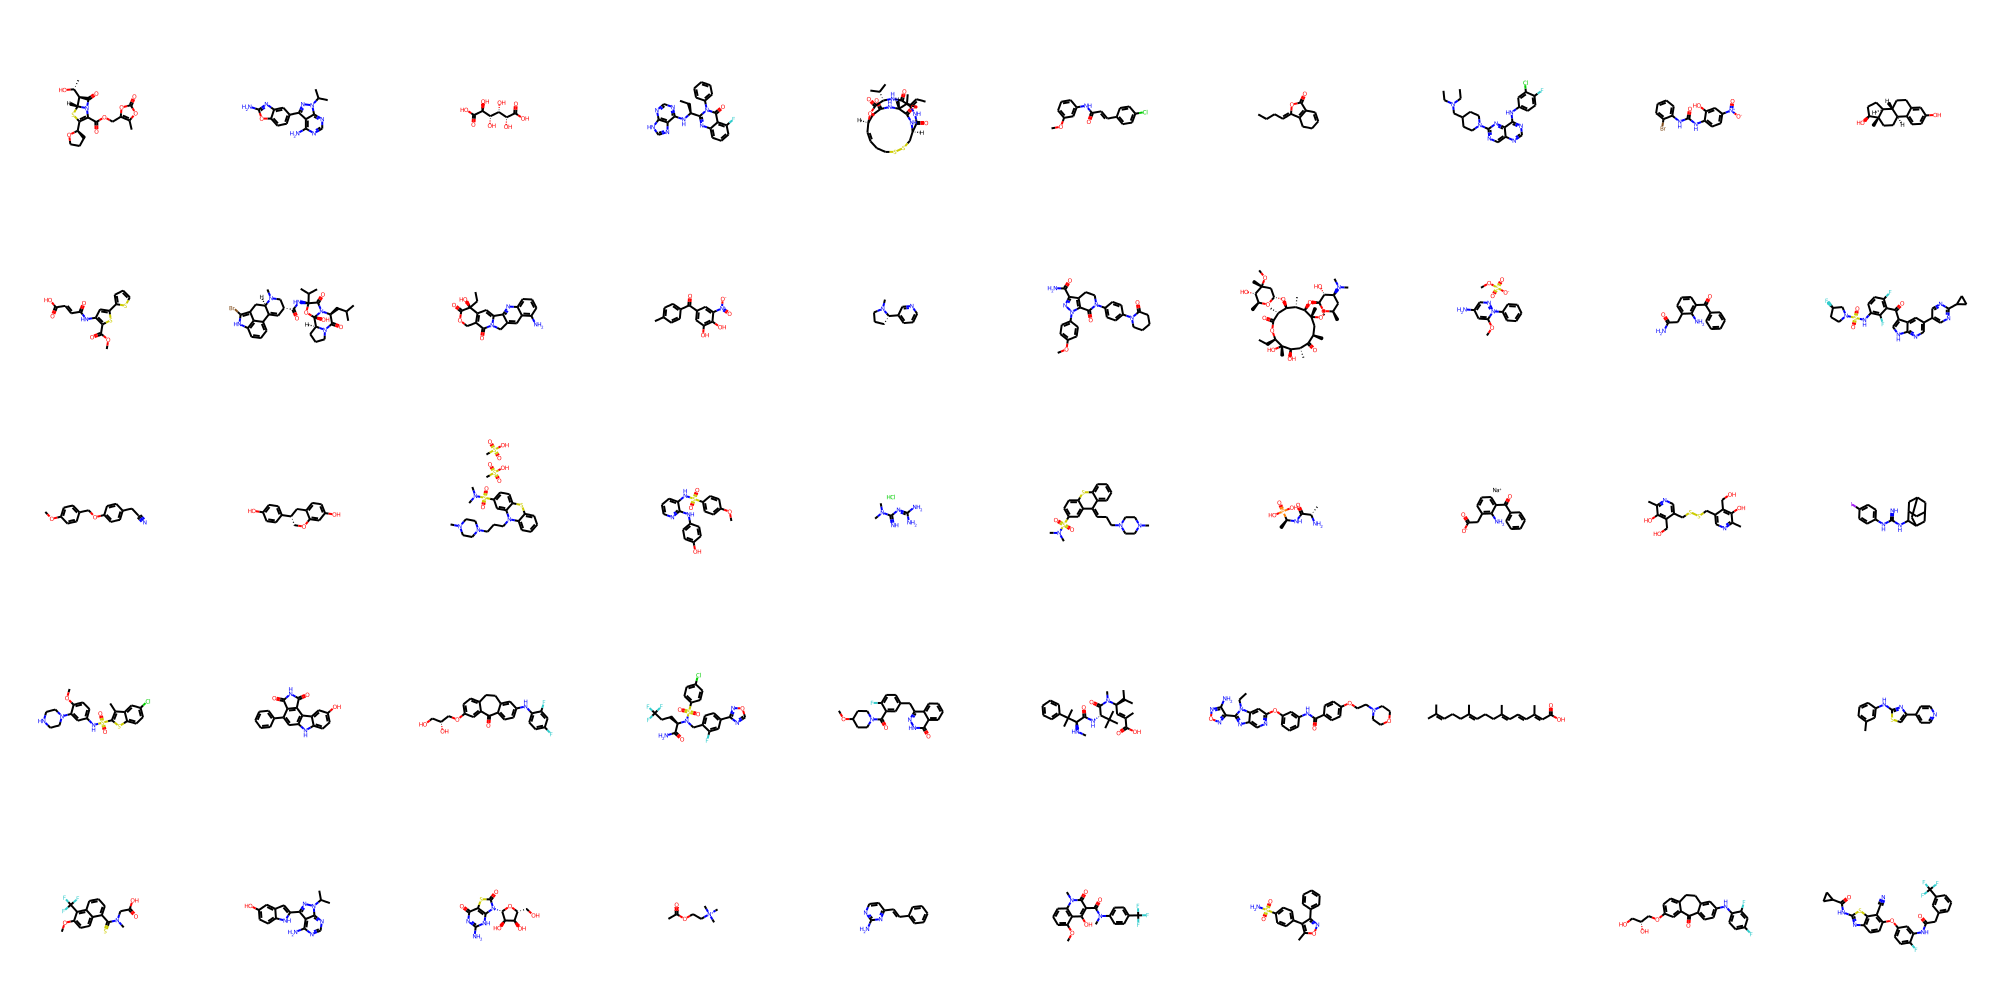

In [2036]:
smiles_list = [

'Cc1oc(=O)oc1COC(=O)C1=C([C@H]2CCCO2)S[C@@H]2[C@@H]([C@@H](C)O)C(=O)N12',
'CC(C)n1nc(-c2ccc3oc(N)nc3c2)c2c(N)ncnc21',
'O=C(O)[C@@H](O)[C@@H](O)[C@H](O)[C@@H](O)C(=O)O',
'CC[C@H](Nc1ncnc2[nH]cnc12)c1nc2cccc(F)c2c(=O)n1-c1ccccc1',
'C/C=C1NC(=O)[C@H]2CSSCC/C=C/[C@H](CC(=O)N[C@H](C(C)C)C(=O)N2)OC(=O)[C@H](C(C)C)NC1=O',
'COc1cccc(NC(=O)/C=C/c2ccc(Cl)cc2)c1',
'CCC/C=C1\OC(=O)C2=C1CCC=C2',
'CCN(CC)CC1CCN(c2ncc3ncnc(Nc4ccc(F)c(Cl)c4)c3n2)CC1',
'O=C(Nc1ccc([N+](=O)[O-])cc1O)Nc1ccccc1Br',
'C[C@]12CC[C@@H]3c4ccc(O)cc4CC[C@H]3[C@@H]1CC[C@@H]2O',
'COC(=O)c1sc(-c2cccs2)cc1NC(=O)/C=C/C(=O)O',
'CC(C)C[C@H]1C(=O)N2CCC[C@H]2[C@]2(O)O[C@](NC(=O)[C@@H]3C=C4c5cccc6[nH]c(Br)c(c56)C[C@H]4N(C)C3)(C(C)C)C(=O)N12',
'CC[C@@]1(O)C(=O)OCc2c1cc1n(c2=O)Cc2cc3c(N)cccc3nc2-1',
'Cc1ccc(C(=O)c2cc(O)c(O)c([N+](=O)[O-])c2)cc1',
'CN1CCC[C@H]1c1cccnc1',
'COc1ccc(-n2nc(C(N)=O)c3c2C(=O)N(c2ccc(N4CCCCC4=O)cc2)CC3)cc1',
'CC[C@H]1OC(=O)[C@H](C)[C@@H](O[C@H]2C[C@@](C)(OC)[C@@H](O)[C@H](C)O2)[C@H](C)[C@@H](O[C@@H]2O[C@H](C)C[C@H](N(C)C)[C@H]2O)[C@](C)(OC)C[C@@H](C)C(=O)[C@H](C)[C@@H](O)[C@]1(C)O',
'COS(=O)(=O)[O-].COc1cc(N)cn[n+]1-c1ccccc1',
'NC(=O)Cc1cccc(C(=O)c2ccccc2)c1N',
'O=C(c1c(F)ccc(NS(=O)(=O)N2CC[C@@H](F)C2)c1F)c1c[nH]c2ncc(-c3cnc(C4CC4)nc3)cc12',
'COc1ccc(COc2ccc(CC#N)cc2)cc1',
'Oc1ccc([C@H]2COc3cc(O)ccc3C2)cc1',
'CN1CCN(CCCN2c3ccccc3Sc3ccc(S(=O)(=O)N(C)C)cc32)CC1.CS(=O)(=O)O.CS(=O)(=O)O',
'COc1ccc(S(=O)(=O)Nc2cccnc2Nc2ccc(O)cc2)cc1',
'CN(C)C(=N)N=C(N)N.Cl',
'CN1CCN(CC/C=C2\c3ccccc3Sc3ccc(S(=O)(=O)N(C)C)cc32)CC1',
'C[C@H](N)C(=O)N[C@@H](C)P(=O)(O)O',
'Nc1c(CC(=O)[O-])cccc1C(=O)c1ccccc1.[Na+]',
'Cc1ncc(CSSCc2cnc(C)c(O)c2CO)c(CO)c1O',
'N=C(Nc1ccc(I)cc1)NC1C2CC3CC(C2)CC1C3',
'COc1ccc(NS(=O)(=O)c2sc3ccc(Cl)cc3c2C)cc1N1CCNCC1',
'O=C1NC(=O)c2c1c(-c1ccccc1)cc1[nH]c3ccc(O)cc3c21',
'O=C1c2ccc(Nc3ccc(F)cc3F)cc2CCc2ccc(OC[C@H](O)CO)cc21',
'NC(=O)[C@@H](CCC(F)(F)F)N(Cc1ccc(-c2ncon2)cc1F)S(=O)(=O)c1ccc(Cl)cc1',
'COC1CCN(C(=O)c2cc(Cc3n[nH]c(=O)c4ccccc34)ccc2F)CC1',
'CN[C@H](C(=O)N[C@H](C(=O)N(C)[C@H](/C=C(\C)C(=O)O)C(C)C)C(C)(C)C)C(C)(C)c1ccccc1',
'CCn1c(-c2nonc2N)nc2cnc(Oc3cccc(NC(=O)c4ccc(OCCN5CCOCC5)cc4)c3)cc21',
'CC(C)=CCC/C(C)=C/CC/C(C)=C/C=C/C(C)=C/C(=O)O',
'No Data',
'Cc1cccc(Nc2nc(-c3ccncc3)cs2)c1',
'COc1ccc2c(C(=S)N(C)CC(=O)O)cccc2c1C(F)(F)F',
'CC(C)n1nc(-c2cc3cc(O)ccc3[nH]2)c2c(N)ncnc21',
'Nc1nc(=O)c2sc(=O)n([C@@H]3O[C@H](CO)[C@@H](O)[C@H]3O)c2[nH]1',
'CC(=O)OCC[N+](C)(C)C',
'Nc1nccc(/C=C/c2ccccc2)n1',
'COc1cccc2c1c(O)c(C(=O)N(C)c1ccc(C(F)(F)F)cc1)c(=O)n2C',
'Cc1onc(-c2ccccc2)c1-c1ccc(S(N)(=O)=O)cc1',
'No Data',
'O=C1c2ccc(Nc3ccc(F)cc3F)cc2CCc2ccc(OC[C@H](O)CO)cc21',
'N#Cc1c(Oc2ccc(F)c(NC(=O)Cc3cccc(C(F)(F)F)c3)c2)ccc2nc(NC(=O)C3CC3)sc12',

               
]
mol_list = []
for smiles in smiles_list:
   mol= Chem.MolFromSmiles (smiles)
   mol_list.append (mol)

img = Draw.MolsToGridImage(mol_list, molsPerRow=10)
img



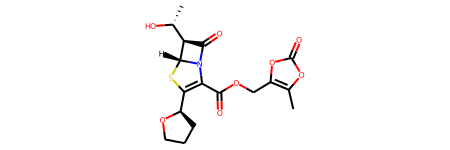

In [2037]:
M1 = mol_list [0]
M1

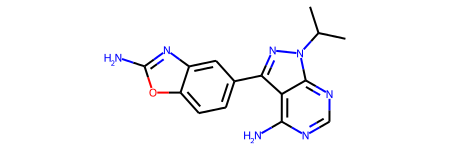

In [2038]:
M2 = mol_list [1]
M2

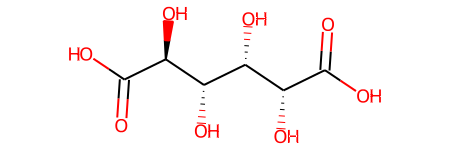

In [2039]:
M3 = mol_list [2]
M3

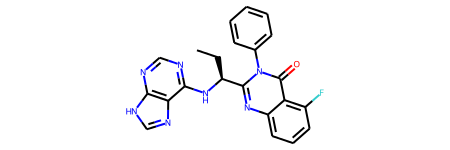

In [2040]:
M4 = mol_list [3]
M4

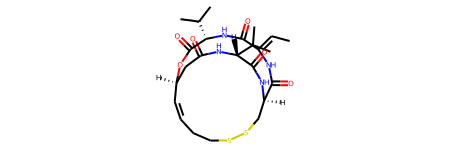

In [2041]:
M5 = mol_list [4]
M5

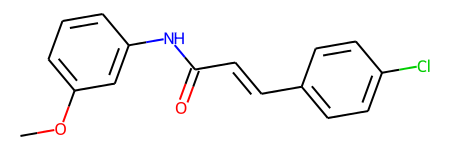

In [2042]:
M6 = mol_list [5]
M6

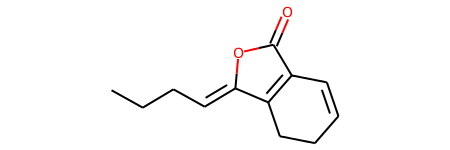

In [2043]:
M7 = mol_list [6]
M7

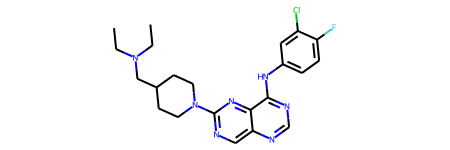

In [2044]:
M8 = mol_list [7]
M8

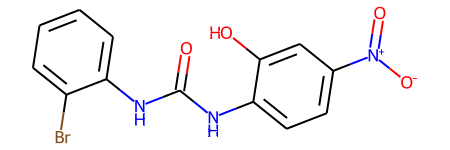

In [2045]:
M9 = mol_list [8]
M9

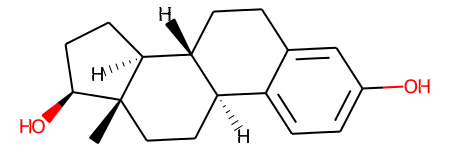

In [2046]:
M10 = mol_list [9]
M10

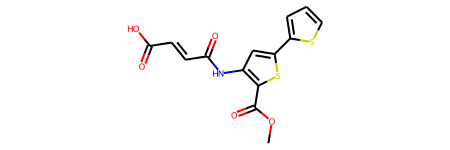

In [2047]:
M11 = mol_list [10]
M11

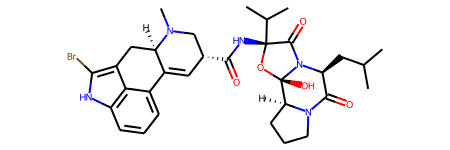

In [2048]:
M12 = mol_list [11]
M12

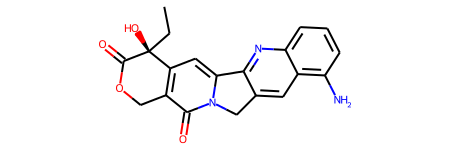

In [2049]:
M13 = mol_list [12]
M13

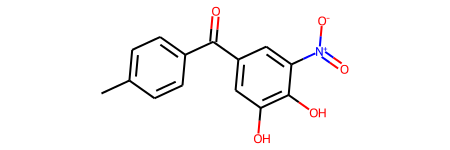

In [2050]:
M14 = mol_list [13]
M14

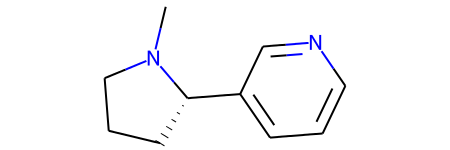

In [2051]:
M15 = mol_list [14]
M15

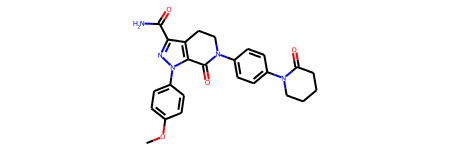

In [2052]:
M16 = mol_list [15]
M16

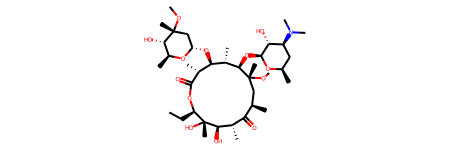

In [2053]:
M17 = mol_list [16]
M17

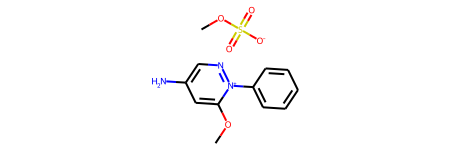

In [2054]:
M18 = mol_list [17]
M18

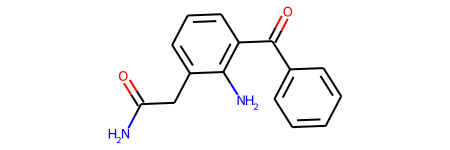

In [2055]:
M19 = mol_list [18]
M19

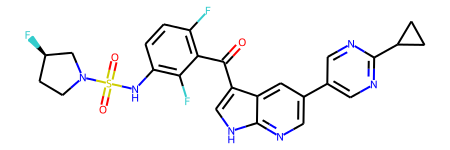

In [2056]:
M20 = mol_list [19]
M20

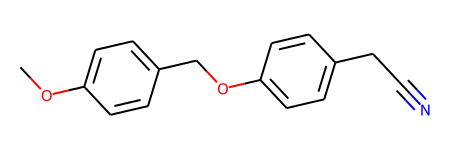

In [2057]:
M21 = mol_list [20]
M21

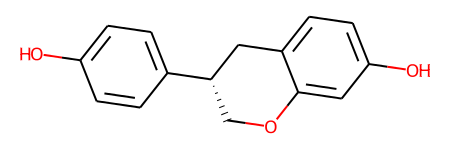

In [2058]:
M22 = mol_list [21]
M22

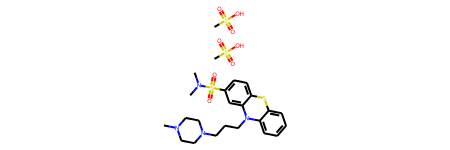

In [2059]:
M23 = mol_list [22]
M23

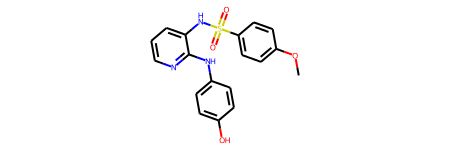

In [2060]:
M24 = mol_list [23]
M24

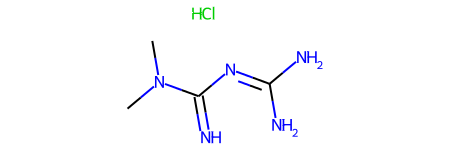

In [2061]:
M25 = mol_list [24]
M25

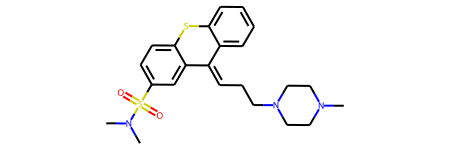

In [2062]:
M26 = mol_list [25]
M26

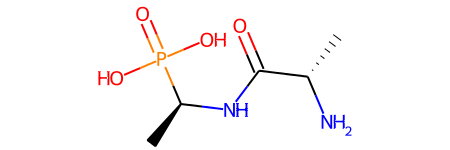

In [2063]:
M27 = mol_list [26]
M27

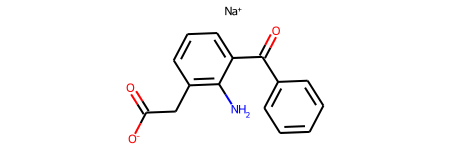

In [2064]:
M28 = mol_list [27]
M28

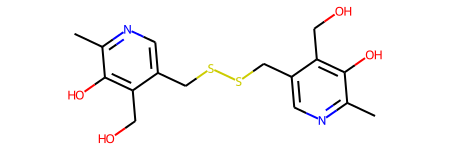

In [2065]:
M29 = mol_list [28]
M29

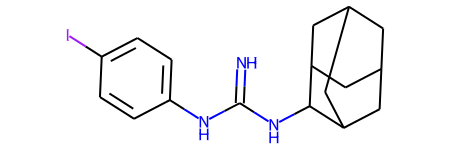

In [2066]:
M30 = mol_list [29]
M30

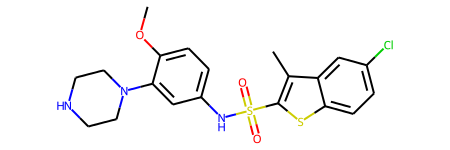

In [2067]:
M31 = mol_list [30]
M31

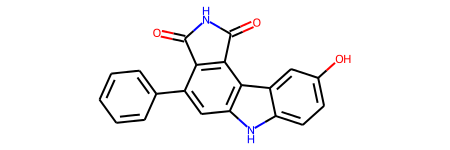

In [2068]:
M32 = mol_list [31]
M32

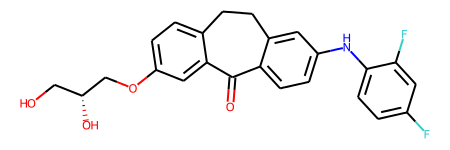

In [2069]:
M33 = mol_list [32]
M33

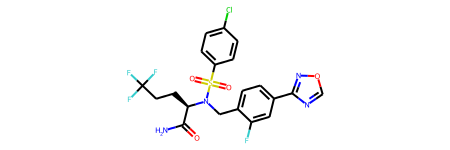

In [2070]:
M34 = mol_list [33]
M34

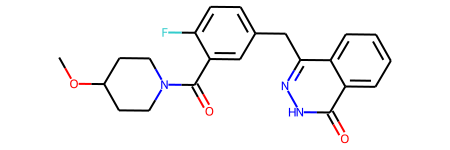

In [2071]:
M35 = mol_list [34]
M35

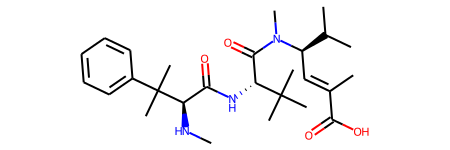

In [2072]:
M36 = mol_list [35]
M36

/usr/local/lib/python3.7/dist-packages/IPython/core/displayhook.py:260: UserWarning: Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.
  'Flushing oldest {cull_count} entries.'.format(sz=sz, cull_count=cull_count))


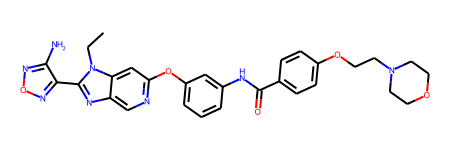

In [2073]:
M37= mol_list [36]
M37

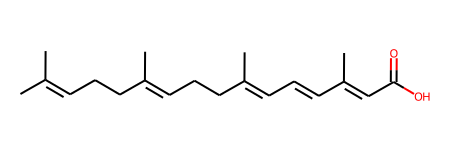

In [2074]:
M38= mol_list [37]
M38

In [2075]:
M39= mol_list [38]
M39

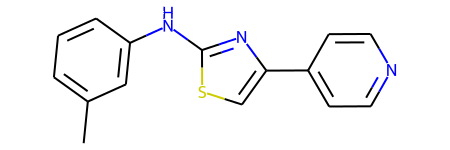

In [2076]:
M40= mol_list [39]
M40

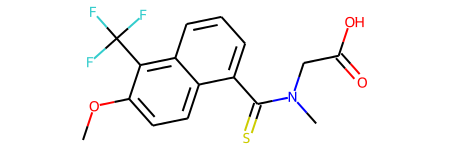

In [2077]:
M41= mol_list [40]
M41

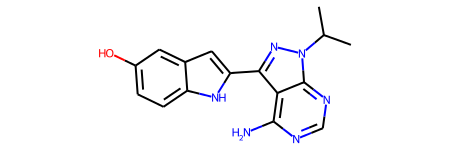

In [2078]:
M42= mol_list [41]
M42

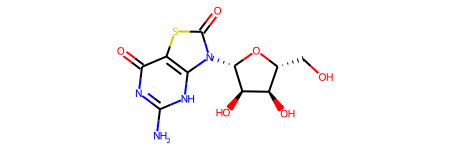

In [2079]:
M43= mol_list [42]
M43

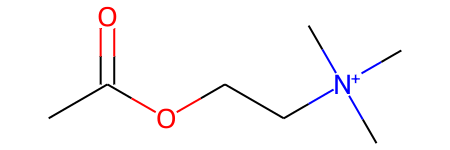

In [2080]:
M44= mol_list [43]
M44

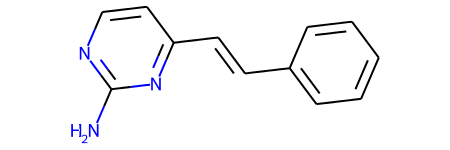

In [2081]:
M45= mol_list [44]
M45

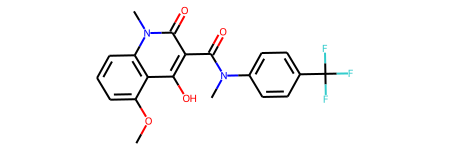

In [2082]:
M46= mol_list [45]
M46

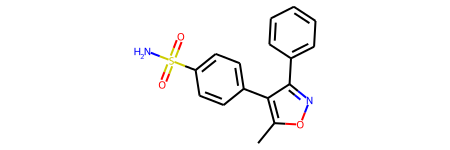

In [2083]:
M47= mol_list [46]
M47

In [2084]:
M48= mol_list [47]
M48

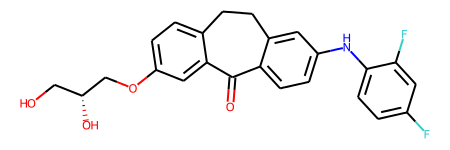

In [2085]:
M49= mol_list [48]
M49

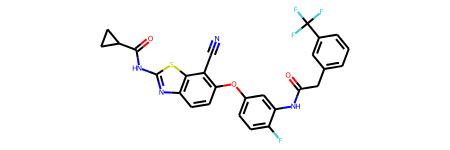

In [2086]:
M50= mol_list [49]
M50

In [2087]:
bi = {}

fp= AllChem.GetMorganFingerprintAsBitVect(M1, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp, fp_arr)
np.nonzero(fp_arr)
list(fp.GetOnBits())

[1,
 4,
 5,
 33,
 45,
 80,
 87,
 96,
 145,
 147,
 208,
 215,
 227,
 255,
 283,
 301,
 314,
 345,
 349,
 356,
 361,
 368,
 383,
 388,
 396,
 419,
 430,
 444,
 470,
 514,
 515,
 580,
 611,
 650,
 656,
 675,
 685,
 687,
 695,
 698,
 703,
 745,
 802,
 807,
 834,
 835,
 852,
 893,
 898,
 905,
 926,
 935,
 950,
 953,
 1011,
 1019]

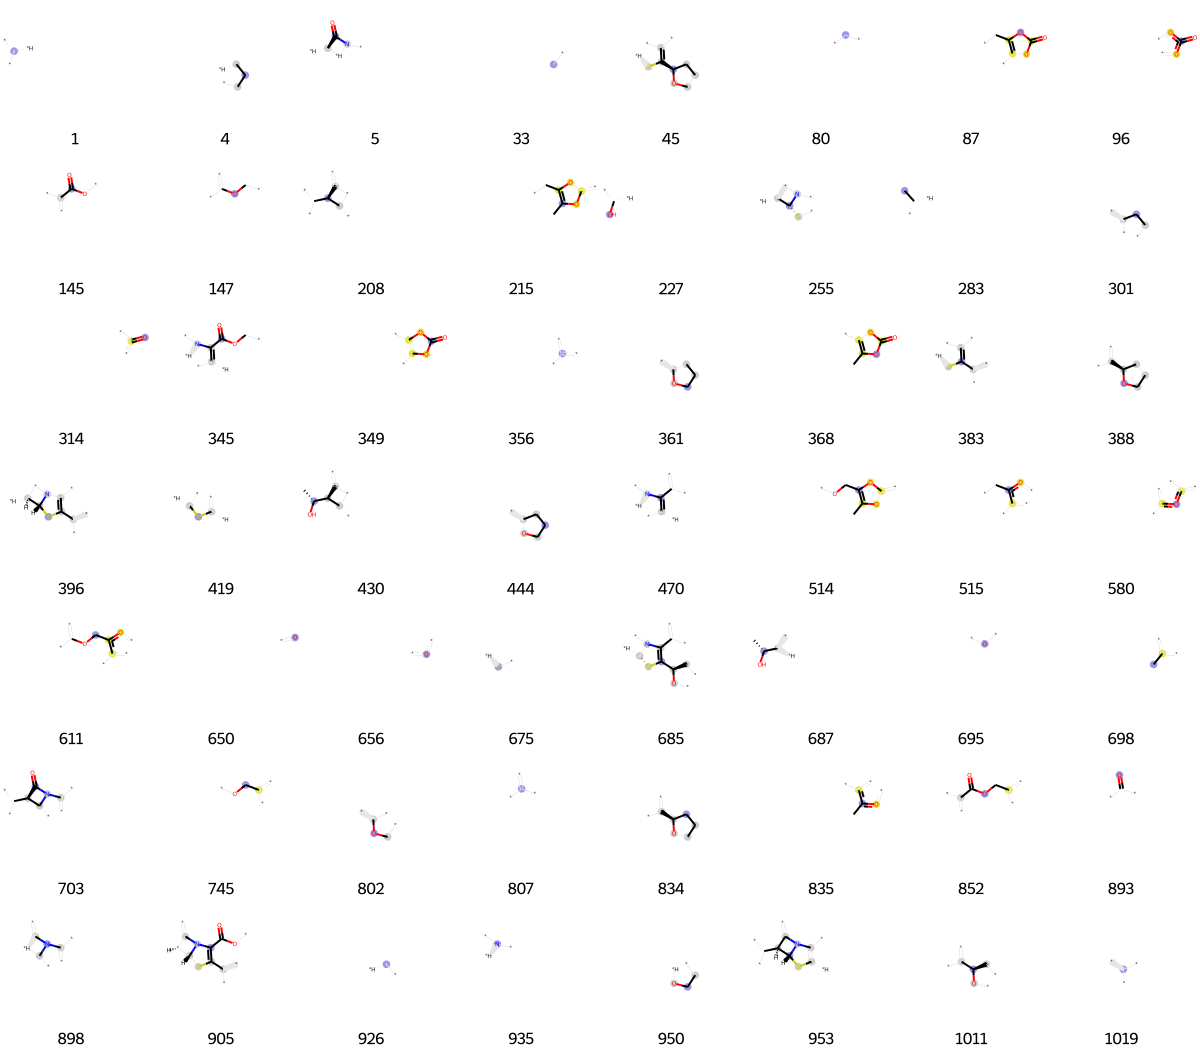

In [2088]:
prints = [(M1, x, bi) for x in fp.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp.GetOnBits ()])

In [2089]:
bi = {}

fp2= AllChem.GetMorganFingerprintAsBitVect(M2, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp2, fp_arr)
np.nonzero(fp_arr)
list(fp2.GetOnBits())

[1,
 32,
 33,
 73,
 134,
 136,
 147,
 157,
 186,
 209,
 231,
 267,
 283,
 323,
 356,
 360,
 378,
 383,
 396,
 428,
 433,
 435,
 454,
 459,
 489,
 509,
 548,
 580,
 656,
 672,
 726,
 784,
 786,
 803,
 831,
 849,
 875,
 896,
 932,
 935,
 960,
 972,
 1005]

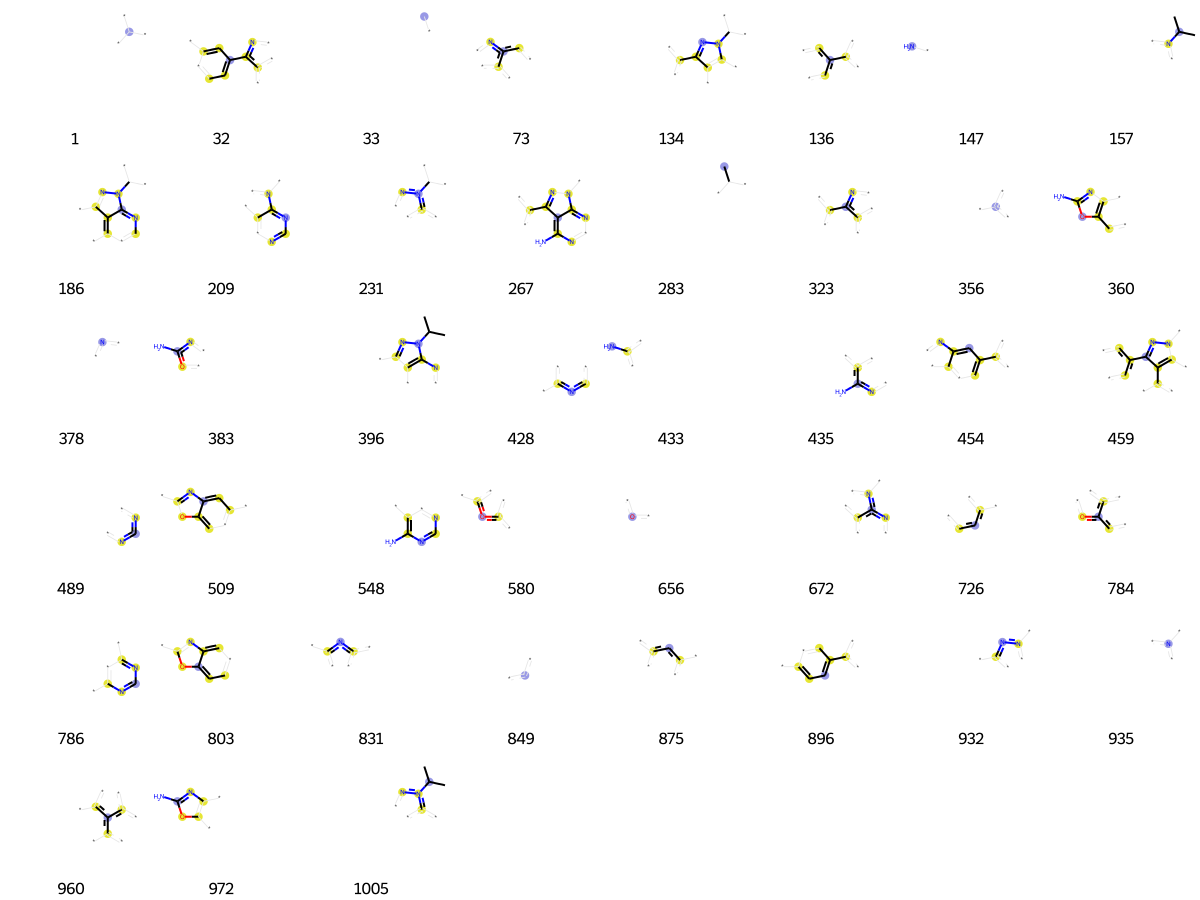

In [2090]:
prints = [(M2, x, bi) for x in fp2.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp2.GetOnBits ()])

In [2091]:
bi = {}

fp3= AllChem.GetMorganFingerprintAsBitVect(M3, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp3, fp_arr)
np.nonzero(fp_arr)
list(fp3.GetOnBits())

[1, 216, 227, 387, 389, 411, 650, 807, 820, 829, 876, 893]

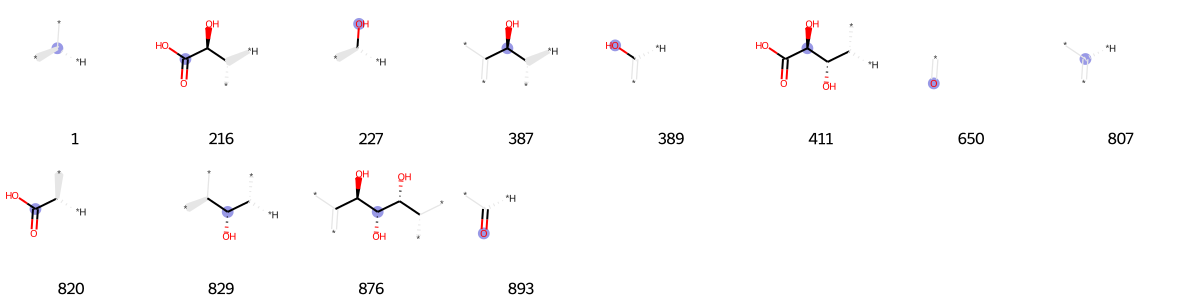

In [2092]:
prints = [(M3, x, bi) for x in fp3.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp3.GetOnBits ()])

In [2093]:
bi = {}

fp4= AllChem.GetMorganFingerprintAsBitVect(M4, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp4, fp_arr)
np.nonzero(fp_arr)
list(fp4.GetOnBits())

[1,
 8,
 15,
 25,
 33,
 47,
 58,
 64,
 73,
 80,
 90,
 128,
 147,
 151,
 175,
 193,
 253,
 274,
 289,
 291,
 294,
 298,
 314,
 335,
 337,
 339,
 343,
 356,
 378,
 389,
 428,
 488,
 489,
 504,
 520,
 536,
 650,
 690,
 699,
 700,
 708,
 713,
 726,
 786,
 787,
 801,
 806,
 816,
 831,
 834,
 849,
 859,
 904,
 920,
 931,
 935,
 960,
 969,
 983]

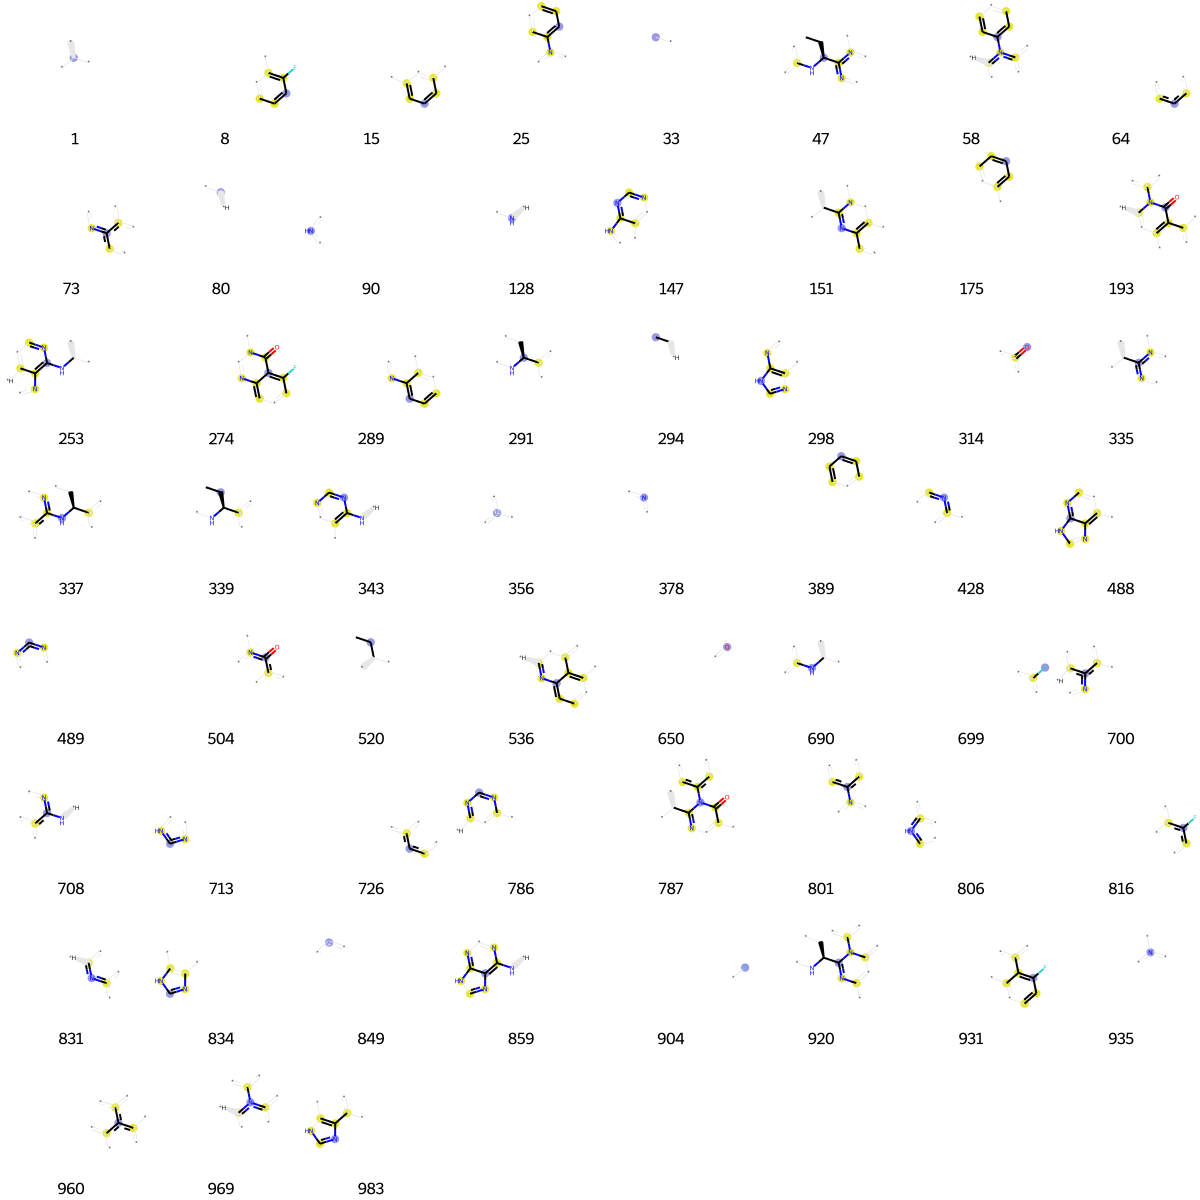

In [2094]:
prints = [(M4, x, bi) for x in fp4.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp4.GetOnBits ()])

In [2095]:
bi = {}

fp5= AllChem.GetMorganFingerprintAsBitVect(M5, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp5, fp_arr)
np.nonzero(fp_arr)
list(fp5.GetOnBits())

[1,
 10,
 11,
 33,
 36,
 45,
 53,
 59,
 65,
 81,
 90,
 98,
 104,
 123,
 150,
 194,
 198,
 216,
 231,
 253,
 277,
 283,
 301,
 314,
 331,
 349,
 356,
 409,
 466,
 478,
 482,
 508,
 519,
 551,
 561,
 633,
 650,
 656,
 675,
 694,
 713,
 746,
 750,
 765,
 769,
 777,
 789,
 795,
 797,
 804,
 840,
 844,
 849,
 899,
 926,
 941,
 968,
 991,
 1019]

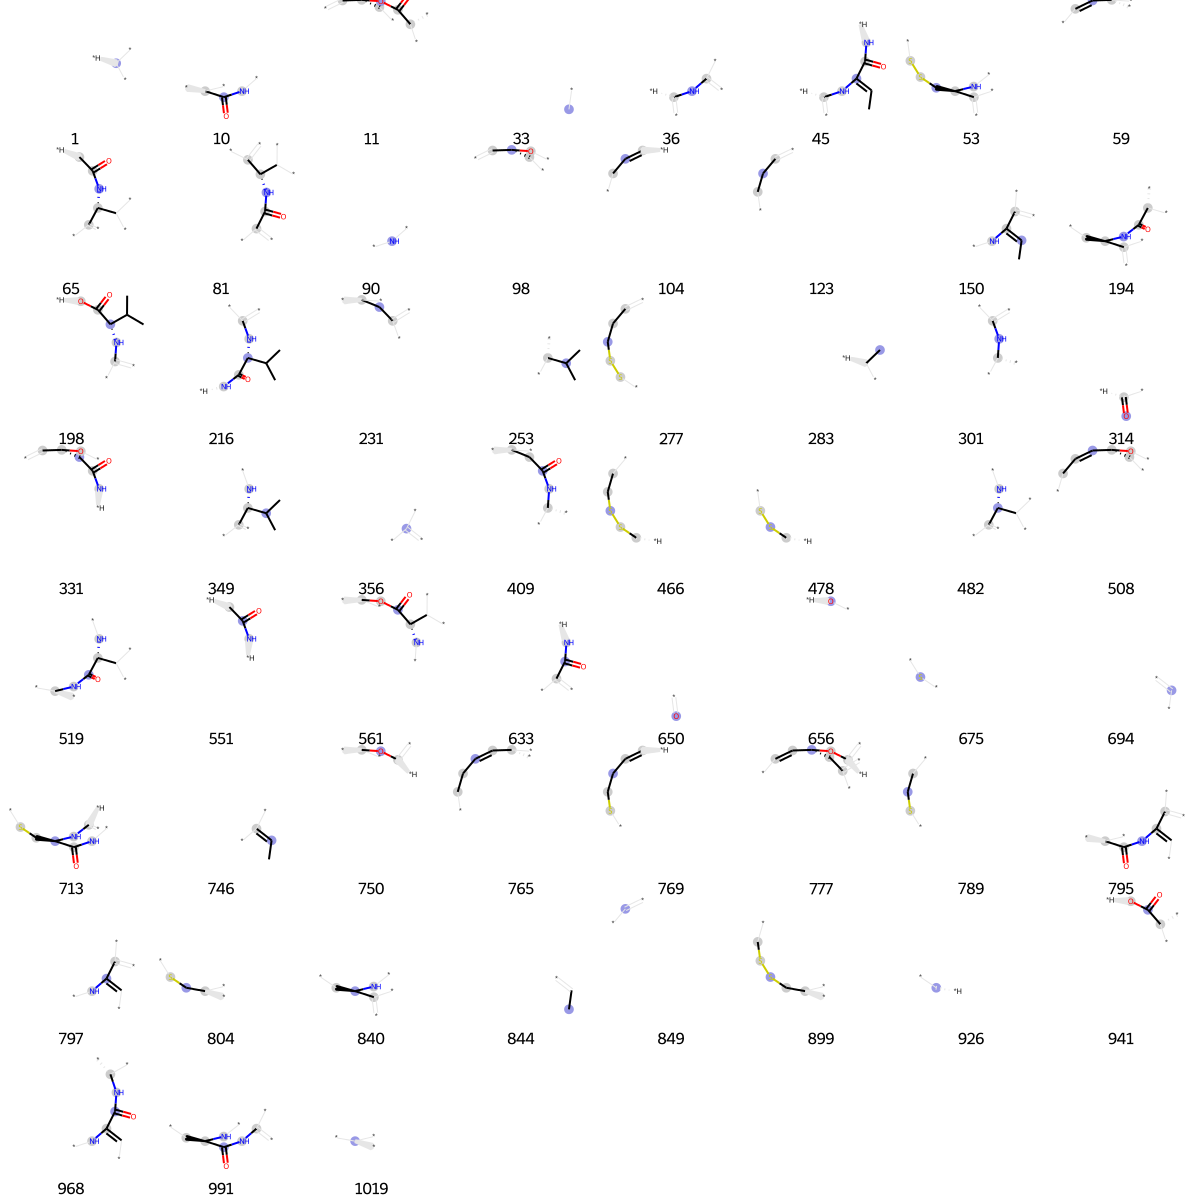

In [2096]:
prints = [(M5, x, bi) for x in fp5.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp5.GetOnBits ()])

In [2097]:
bi = {}

fp6= AllChem.GetMorganFingerprintAsBitVect(M6, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp6, fp_arr)
np.nonzero(fp_arr)
list(fp6.GetOnBits())

[15,
 25,
 31,
 33,
 46,
 64,
 128,
 157,
 184,
 191,
 216,
 284,
 322,
 327,
 356,
 386,
 420,
 512,
 561,
 562,
 650,
 659,
 694,
 695,
 703,
 726,
 781,
 792,
 807,
 816,
 835,
 841,
 849,
 875,
 878,
 893,
 948,
 1009,
 1015]

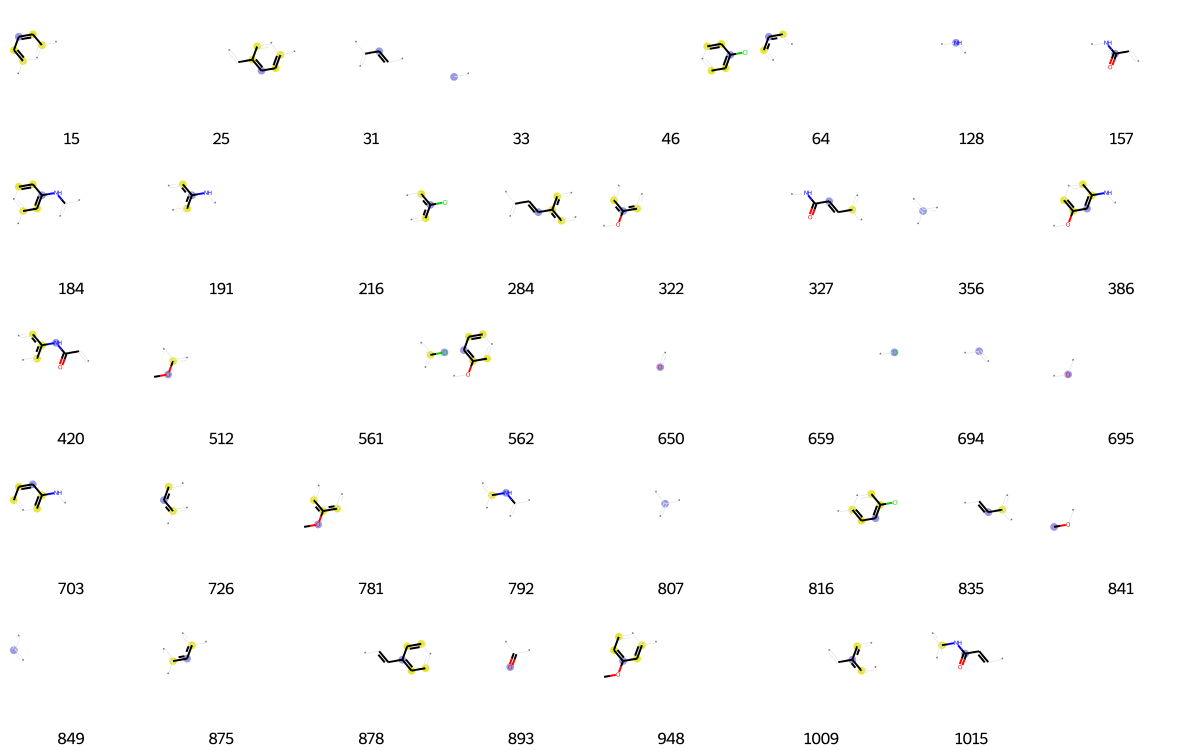

In [2098]:
prints = [(M6, x, bi) for x in fp6.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp6.GetOnBits ()])

In [2099]:
bi = {}

fp7= AllChem.GetMorganFingerprintAsBitVect(M7, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp7, fp_arr)
np.nonzero(fp_arr)
list(fp7.GetOnBits())

[5,
 24,
 33,
 64,
 80,
 104,
 123,
 228,
 294,
 314,
 356,
 401,
 436,
 461,
 510,
 518,
 547,
 562,
 601,
 615,
 650,
 652,
 656,
 679,
 694,
 714,
 770,
 786,
 794,
 849,
 926,
 928,
 949,
 1002]

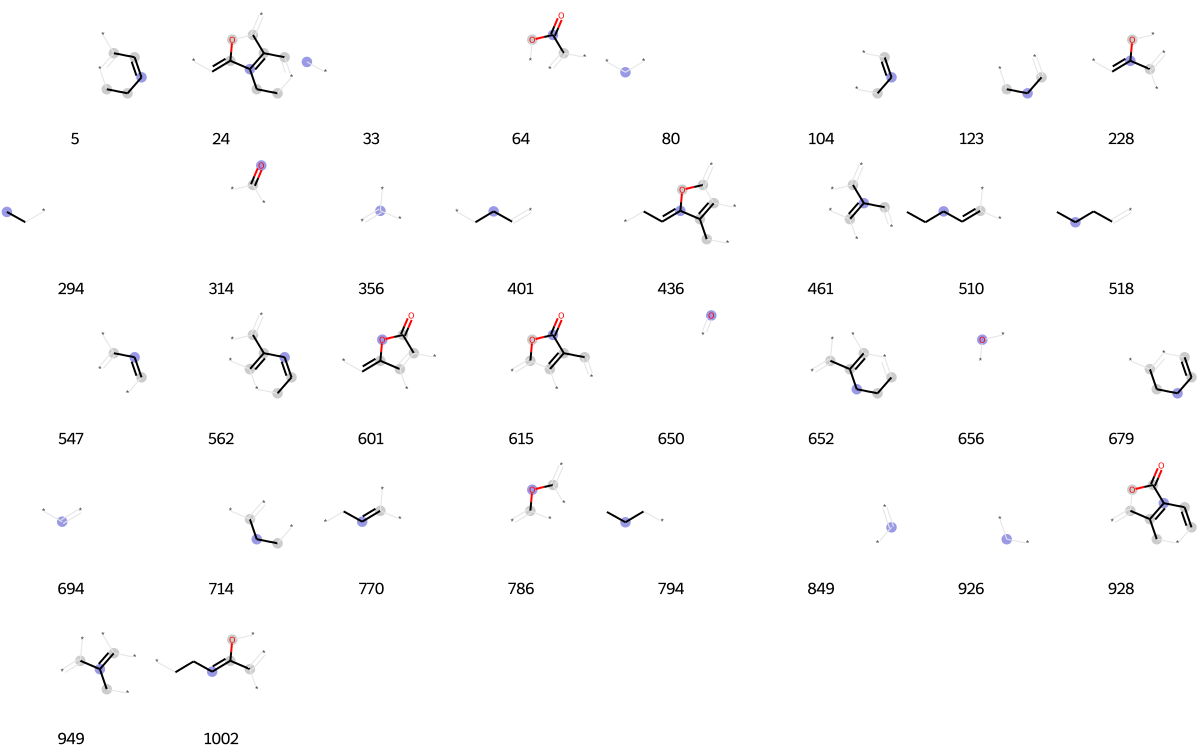

In [2100]:
prints = [(M7, x, bi) for x in fp7.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp7.GetOnBits ()])

In [2101]:
bi = {}

fp8= AllChem.GetMorganFingerprintAsBitVect(M8, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp8, fp_arr)
np.nonzero(fp_arr)
list(fp8.GetOnBits())

[8,
 17,
 29,
 33,
 73,
 80,
 82,
 128,
 169,
 191,
 202,
 216,
 232,
 251,
 287,
 294,
 301,
 329,
 335,
 343,
 356,
 366,
 378,
 407,
 428,
 437,
 456,
 464,
 465,
 489,
 491,
 511,
 557,
 561,
 644,
 659,
 699,
 700,
 708,
 726,
 786,
 800,
 816,
 831,
 834,
 843,
 849,
 875,
 881,
 888,
 904,
 926,
 932,
 935,
 957,
 1008,
 1010,
 1019]

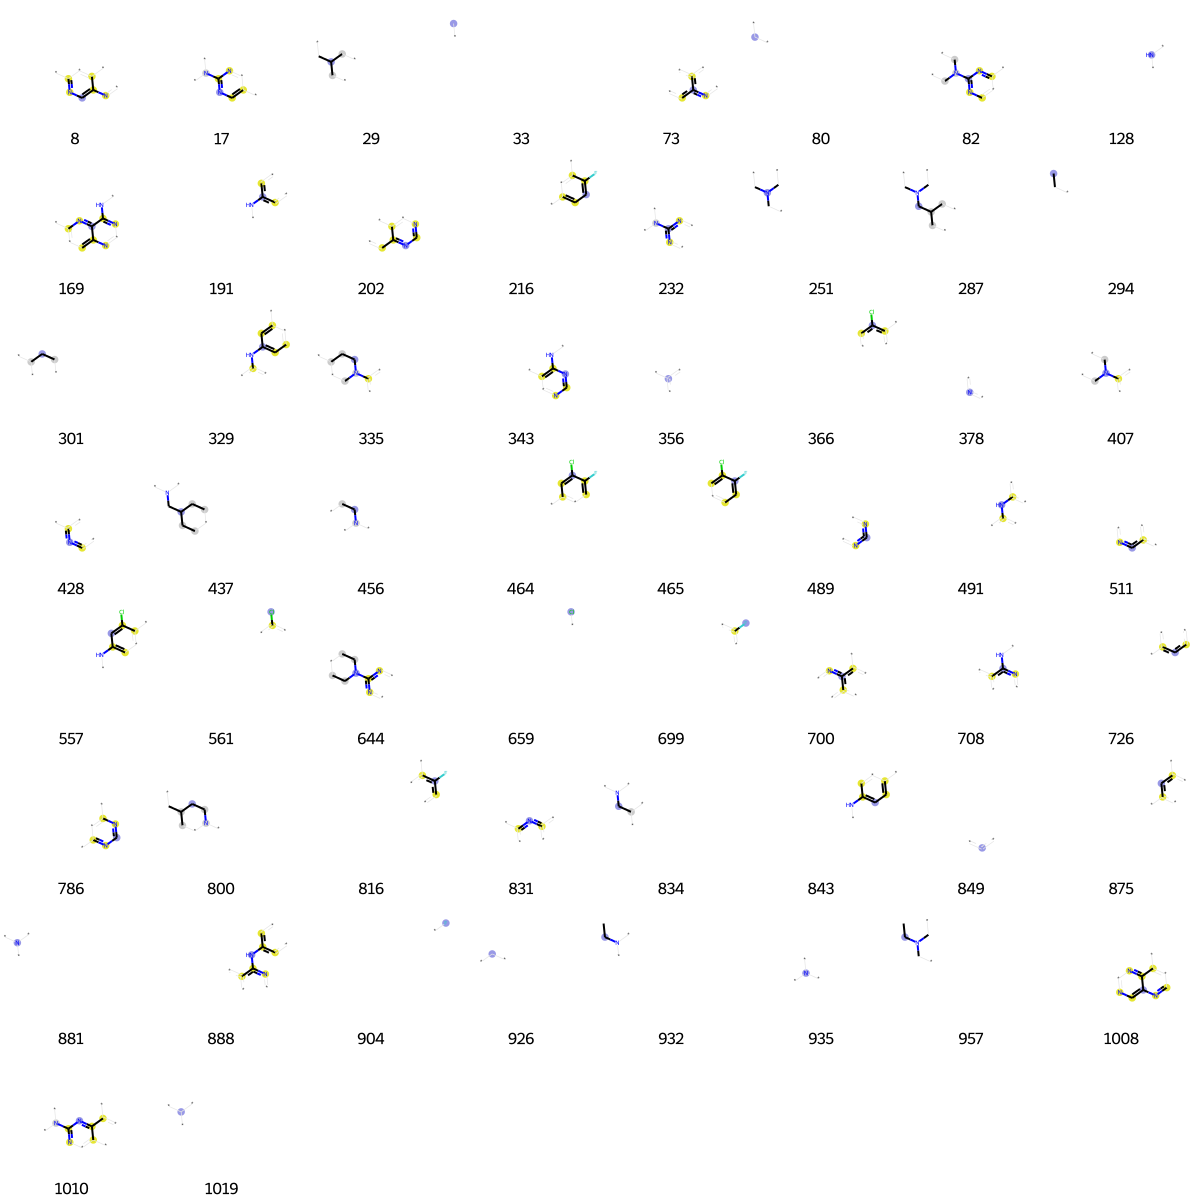

In [2102]:
prints = [(M8, x, bi) for x in fp8.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp8.GetOnBits ()])


In [2103]:
bi = {}

fp9= AllChem.GetMorganFingerprintAsBitVect(M9, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp9, fp_arr)
np.nonzero(fp_arr)
list(fp9.GetOnBits())

[56,
 57,
 64,
 68,
 105,
 128,
 171,
 175,
 200,
 250,
 356,
 573,
 578,
 583,
 607,
 650,
 672,
 715,
 726,
 728,
 753,
 785,
 790,
 792,
 807,
 832,
 833,
 838,
 849,
 875,
 879,
 893,
 916,
 939,
 965,
 974,
 993]

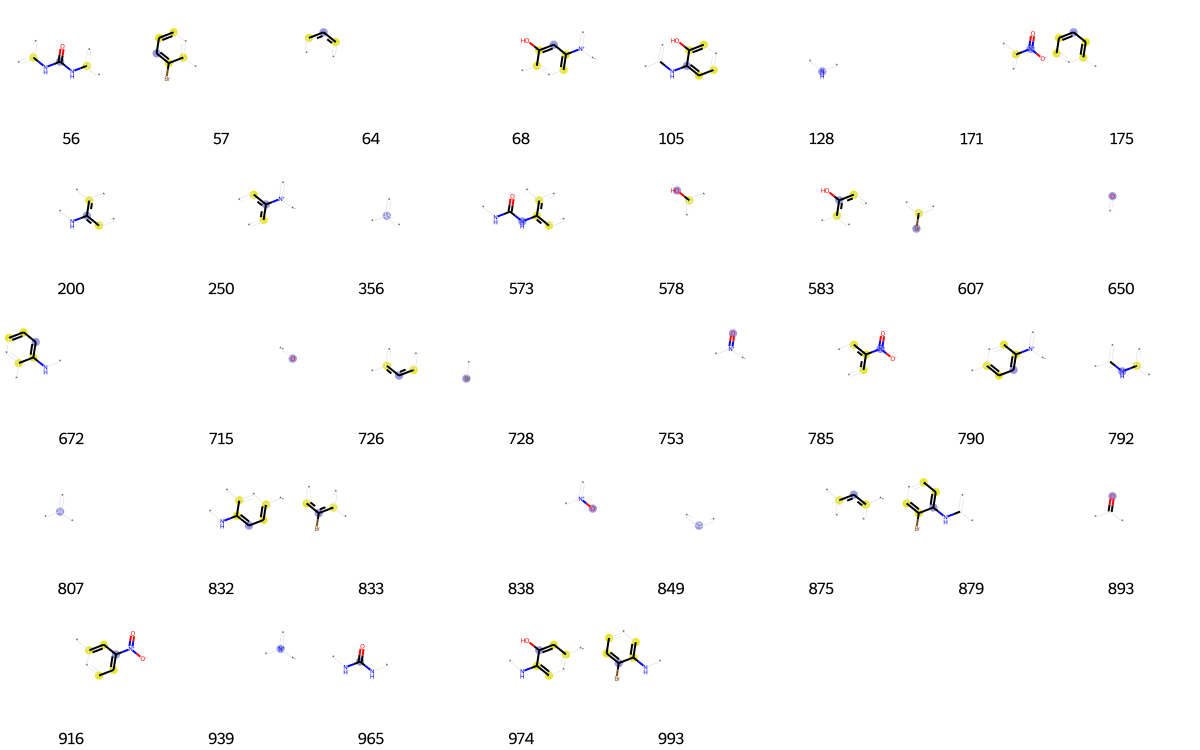

In [2104]:
prints = [(M9, x, bi) for x in fp9.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp9.GetOnBits ()])

In [2105]:
bi = {}

fp10= AllChem.GetMorganFingerprintAsBitVect(M10, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp10, fp_arr)
np.nonzero(fp_arr)
list(fp10.GetOnBits())

[3,
 15,
 33,
 36,
 49,
 105,
 118,
 138,
 212,
 233,
 250,
 289,
 301,
 356,
 381,
 408,
 453,
 455,
 519,
 561,
 562,
 578,
 622,
 636,
 713,
 714,
 726,
 728,
 745,
 760,
 807,
 823,
 849,
 875,
 887,
 917,
 926,
 927,
 1019]

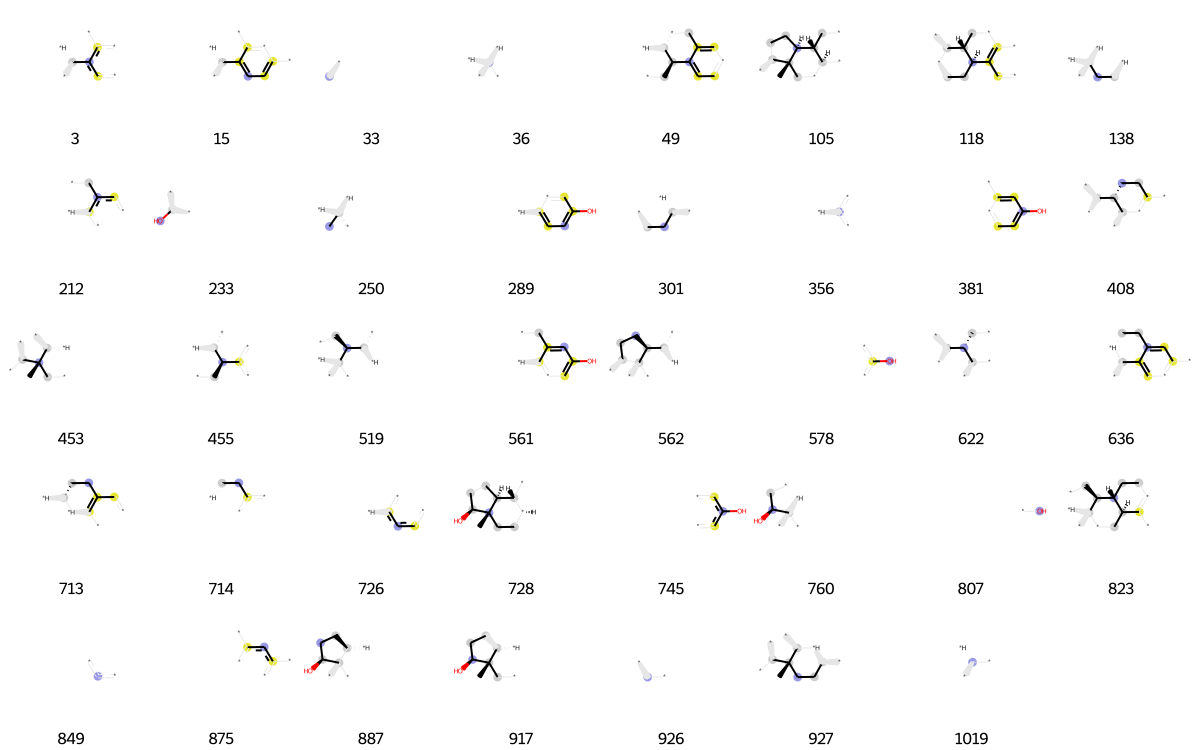

In [2106]:
prints = [(M10, x, bi) for x in fp10.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp10.GetOnBits ()])

In [2107]:
bi = {}

fp11= AllChem.GetMorganFingerprintAsBitVect(M11, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp11, fp_arr)
np.nonzero(fp_arr)
list(fp11.GetOnBits())

[14,
 31,
 33,
 62,
 64,
 65,
 104,
 112,
 128,
 145,
 157,
 162,
 200,
 241,
 267,
 318,
 356,
 383,
 389,
 419,
 438,
 508,
 519,
 543,
 554,
 555,
 650,
 670,
 675,
 694,
 695,
 726,
 781,
 792,
 807,
 841,
 849,
 875,
 893,
 906,
 976,
 1015]

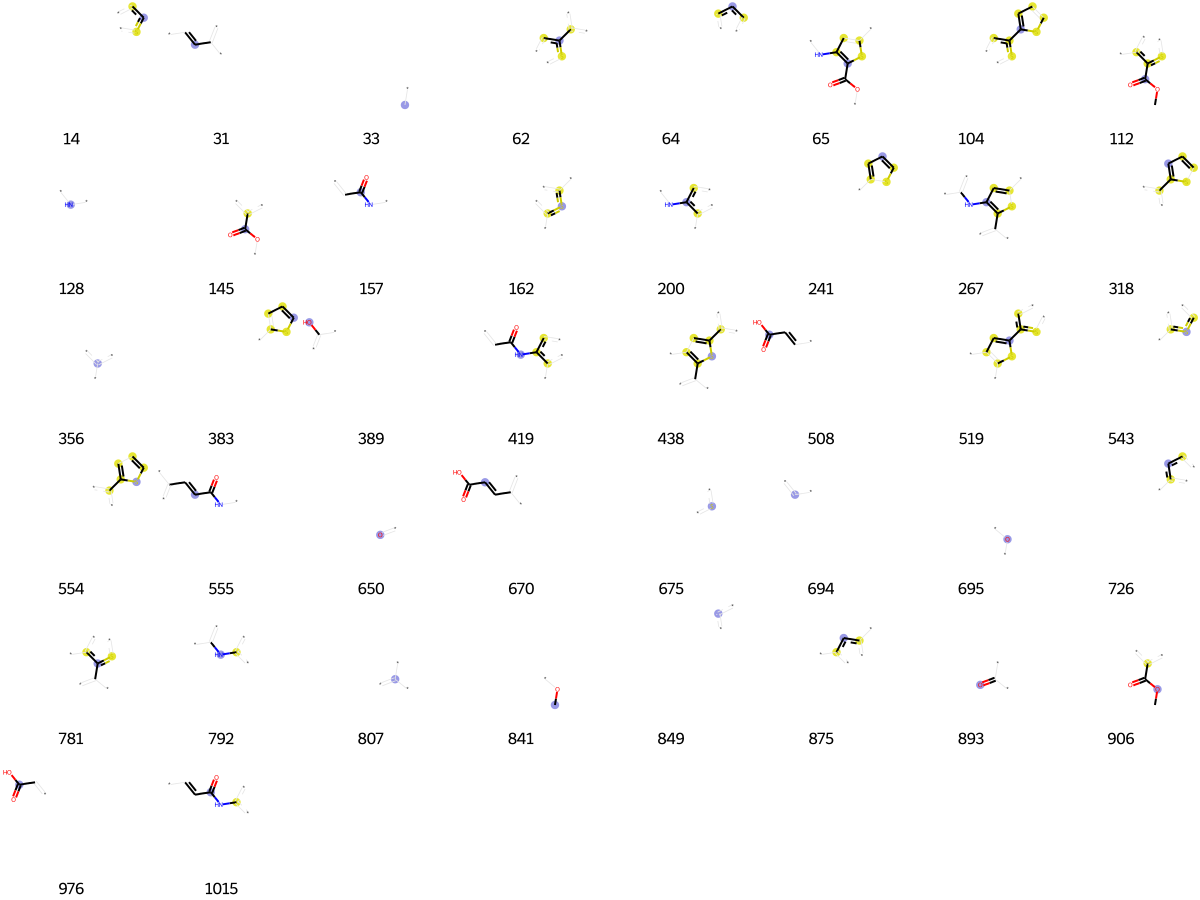

In [2108]:
prints = [(M11, x, bi) for x in fp11.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp11.GetOnBits ()])

In [2109]:
bi = {}

fp12= AllChem.GetMorganFingerprintAsBitVect(M12, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp12, fp_arr)
np.nonzero(fp_arr)
list(fp12.GetOnBits())

[1,
 4,
 5,
 15,
 33,
 36,
 50,
 64,
 77,
 80,
 81,
 90,
 94,
 98,
 110,
 119,
 121,
 128,
 130,
 150,
 202,
 230,
 231,
 250,
 255,
 257,
 269,
 283,
 288,
 301,
 314,
 327,
 335,
 338,
 344,
 352,
 356,
 361,
 424,
 446,
 456,
 486,
 517,
 523,
 524,
 551,
 606,
 607,
 634,
 650,
 656,
 684,
 689,
 694,
 695,
 706,
 716,
 721,
 726,
 728,
 736,
 739,
 742,
 759,
 779,
 784,
 807,
 820,
 823,
 825,
 835,
 849,
 893,
 918,
 924,
 926,
 935,
 953,
 960,
 963,
 974,
 979,
 984,
 989,
 1019]

In [2110]:
bi = {}

fp13= AllChem.GetMorganFingerprintAsBitVect(M13, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp13, fp_arr)
np.nonzero(fp_arr)
list(fp13.GetOnBits())

[15,
 33,
 36,
 43,
 64,
 73,
 80,
 90,
 111,
 130,
 147,
 212,
 233,
 248,
 268,
 289,
 294,
 314,
 323,
 327,
 333,
 356,
 361,
 369,
 378,
 389,
 392,
 402,
 433,
 441,
 472,
 477,
 494,
 497,
 504,
 541,
 609,
 646,
 650,
 656,
 657,
 668,
 706,
 726,
 762,
 794,
 807,
 831,
 849,
 856,
 875,
 910,
 922,
 926,
 935,
 956,
 1011]

In [2111]:
bi = {}

fp14= AllChem.GetMorganFingerprintAsBitVect(M14, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp14, fp_arr)
np.nonzero(fp_arr)
list(fp14.GetOnBits())

[9,
 33,
 105,
 125,
 171,
 202,
 235,
 311,
 354,
 356,
 361,
 536,
 555,
 578,
 583,
 650,
 673,
 698,
 715,
 716,
 726,
 751,
 753,
 799,
 807,
 816,
 838,
 839,
 849,
 875,
 893,
 896,
 939]

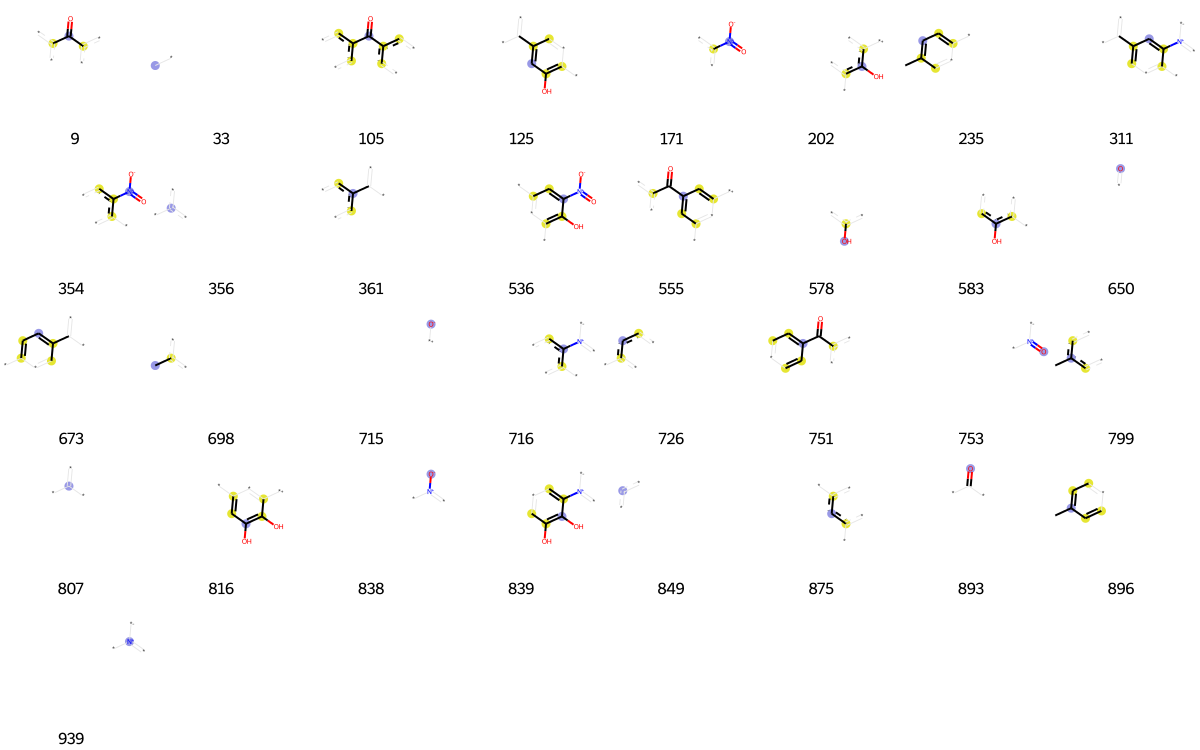

In [2112]:
prints = [(M14, x, bi) for x in fp14.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp14.GetOnBits ()])

In [2113]:
bi = {}

fp15= AllChem.GetMorganFingerprintAsBitVect(M15, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp15, fp_arr)
np.nonzero(fp_arr)
list(fp15.GetOnBits())

[4,
 19,
 33,
 56,
 64,
 121,
 168,
 231,
 255,
 288,
 301,
 356,
 368,
 378,
 437,
 446,
 456,
 486,
 511,
 562,
 579,
 639,
 726,
 749,
 842,
 849,
 926,
 935,
 1019]

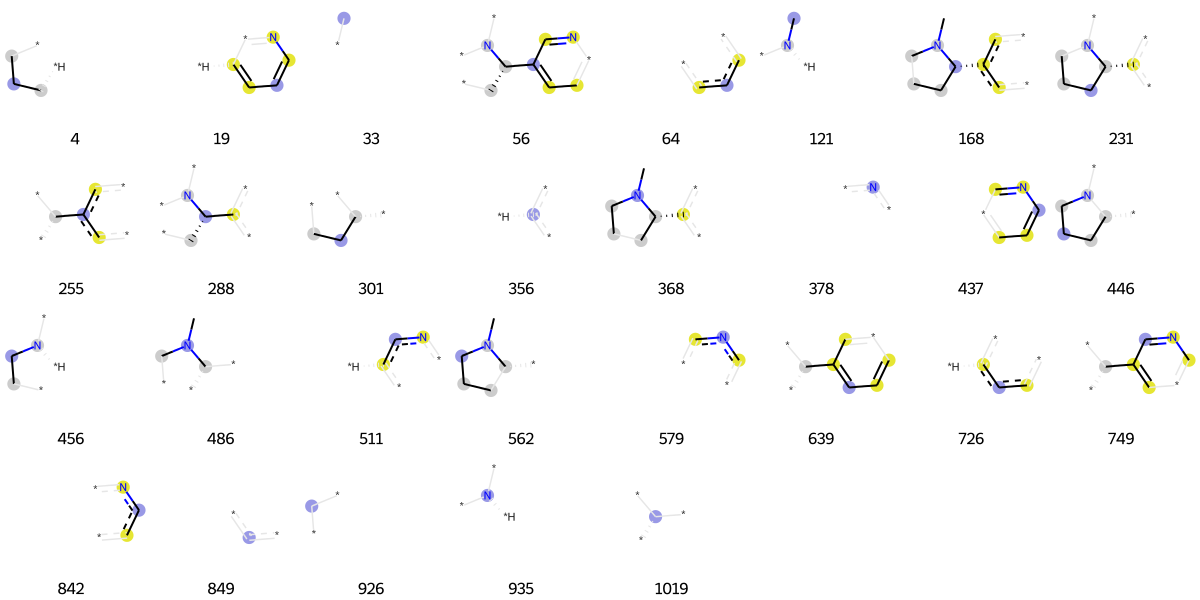

In [2114]:
prints = [(M15, x, bi) for x in fp15.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp15.GetOnBits ()])

In [2115]:
bi = {}

fp16= AllChem.GetMorganFingerprintAsBitVect(M16, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp16, fp_arr)
np.nonzero(fp_arr)
list(fp16.GetOnBits())

[4,
 33,
 83,
 99,
 140,
 147,
 158,
 170,
 215,
 233,
 289,
 303,
 309,
 310,
 314,
 322,
 345,
 356,
 361,
 378,
 416,
 433,
 449,
 456,
 490,
 512,
 529,
 541,
 650,
 655,
 695,
 714,
 718,
 726,
 772,
 781,
 798,
 801,
 807,
 821,
 828,
 831,
 841,
 849,
 879,
 893,
 926,
 932,
 935,
 974,
 1017]

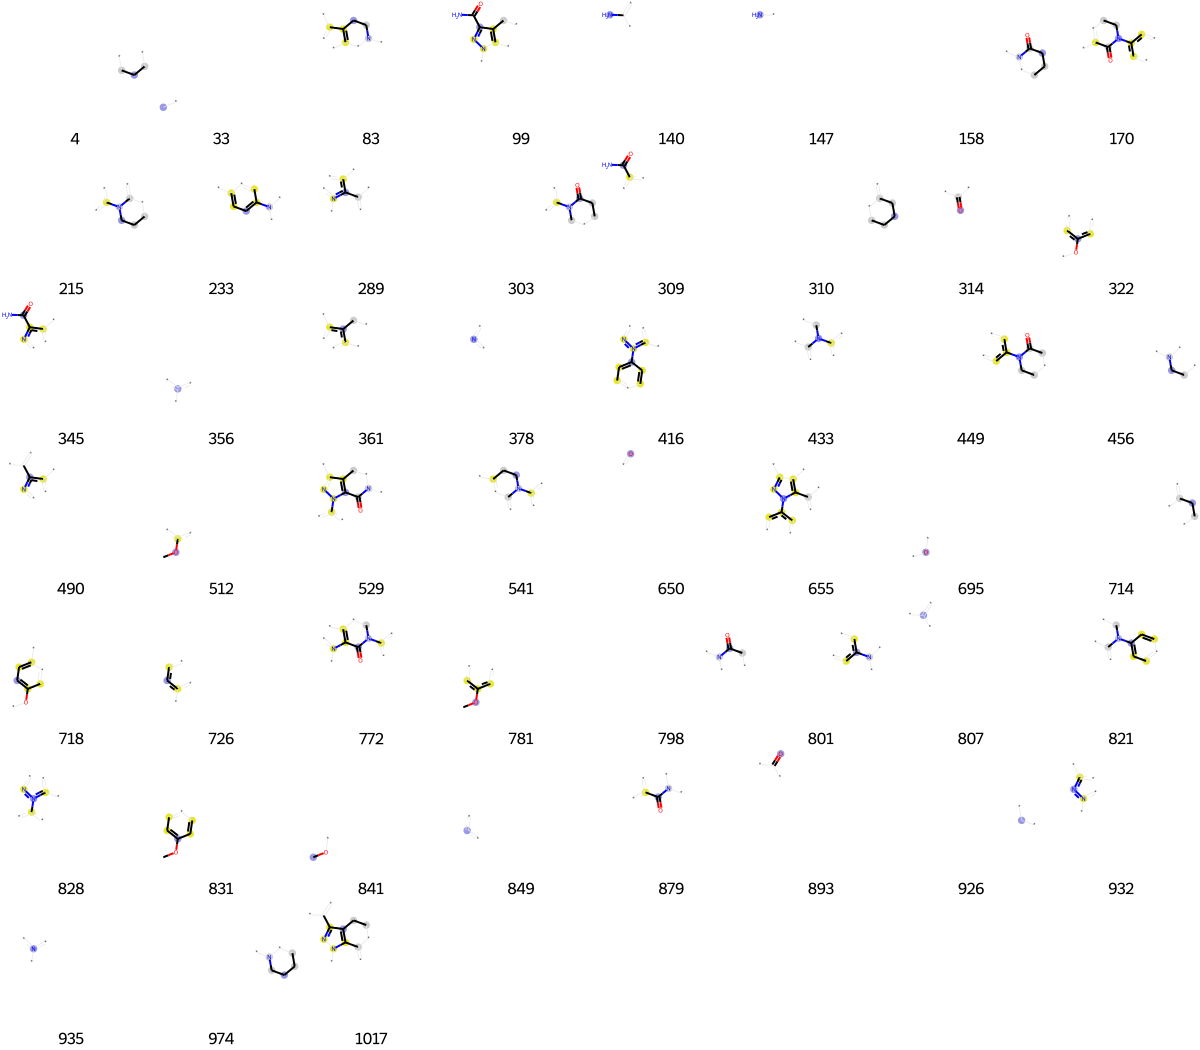

In [2116]:
prints = [(M16, x, bi) for x in fp16.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp16.GetOnBits ()])

In [2117]:
bi = {}

fp17= AllChem.GetMorganFingerprintAsBitVect(M17, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp17, fp_arr)
np.nonzero(fp_arr)
list(fp17.GetOnBits())

[30,
 33,
 36,
 42,
 80,
 130,
 138,
 139,
 140,
 149,
 152,
 193,
 206,
 231,
 233,
 242,
 250,
 268,
 269,
 278,
 281,
 285,
 289,
 294,
 299,
 314,
 317,
 342,
 349,
 356,
 357,
 371,
 403,
 426,
 430,
 438,
 463,
 467,
 474,
 485,
 522,
 560,
 605,
 611,
 612,
 644,
 649,
 650,
 655,
 656,
 679,
 687,
 695,
 722,
 739,
 750,
 755,
 759,
 764,
 807,
 841,
 861,
 869,
 881,
 886,
 897,
 926,
 941,
 960,
 967,
 1019]

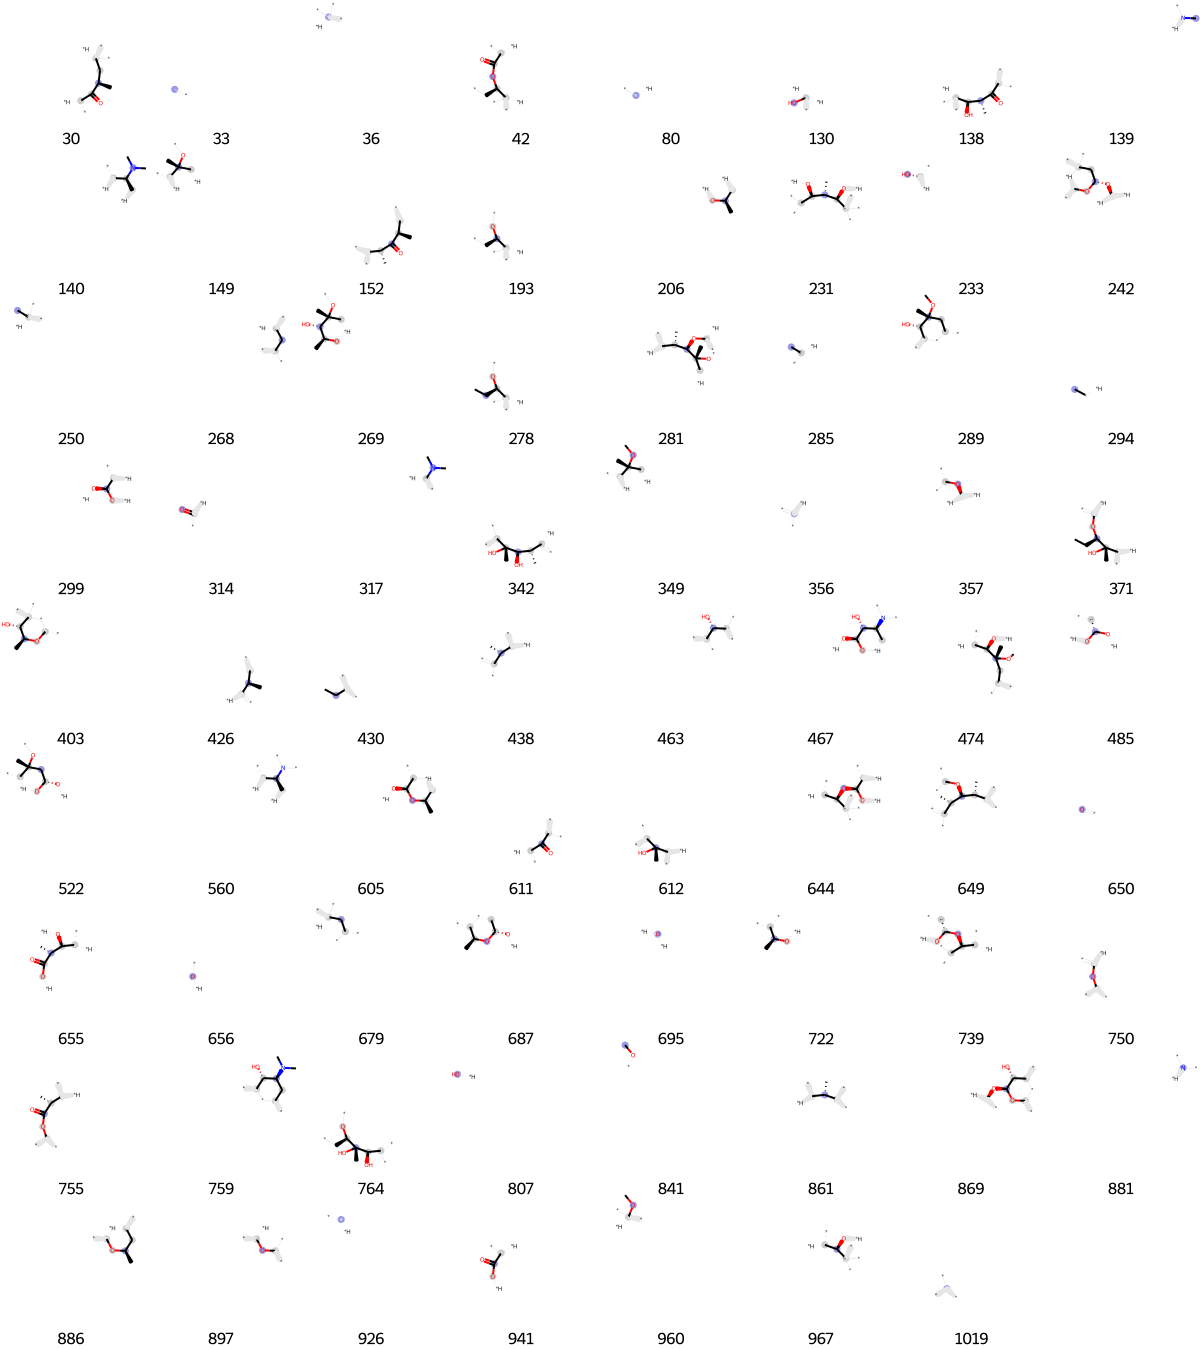

In [2118]:
prints = [(M17, x, bi) for x in fp17.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp17.GetOnBits ()])

In [2119]:
bi = {}

fp18= AllChem.GetMorganFingerprintAsBitVect(M18, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp18, fp_arr)
np.nonzero(fp_arr)
list(fp18.GetOnBits())

[0,
 33,
 64,
 115,
 119,
 131,
 147,
 175,
 208,
 225,
 244,
 285,
 308,
 350,
 356,
 378,
 389,
 394,
 424,
 433,
 452,
 463,
 503,
 511,
 512,
 525,
 615,
 650,
 695,
 715,
 726,
 739,
 771,
 841,
 849,
 875,
 888,
 1019]

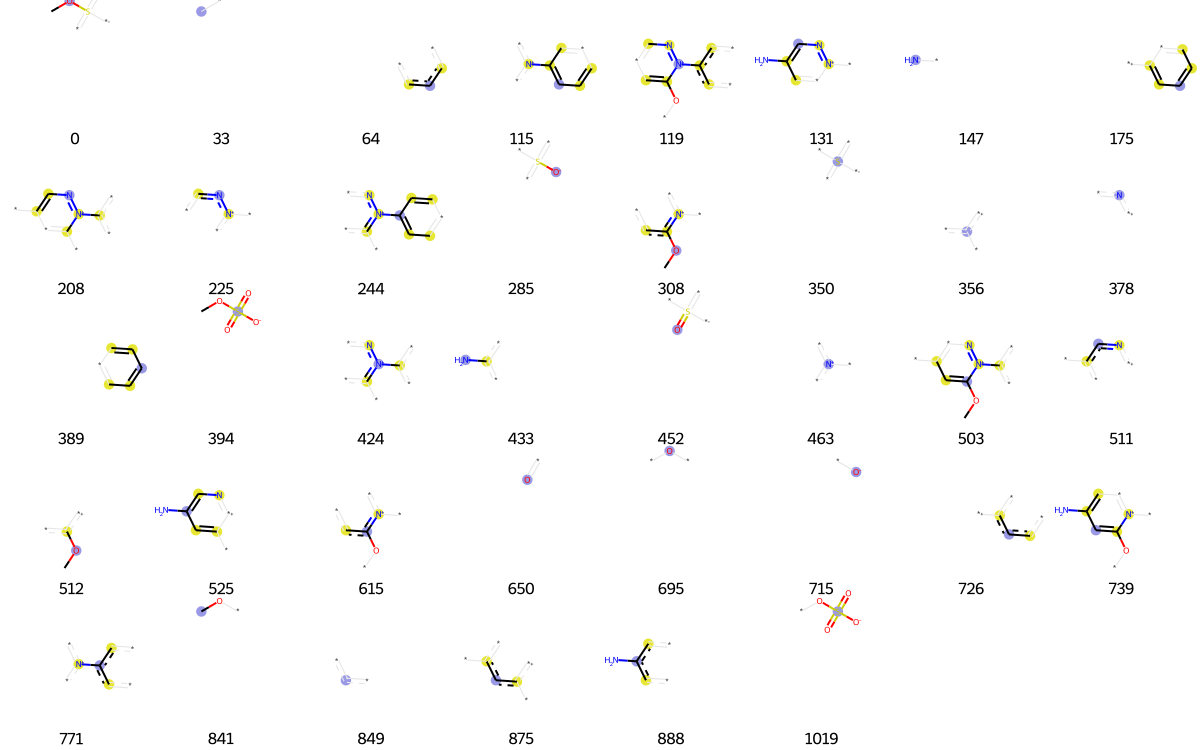

In [2120]:
prints = [(M18, x, bi) for x in fp18.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp18.GetOnBits ()])

In [2121]:
bi = {}

fp19= AllChem.GetMorganFingerprintAsBitVect(M19, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp19, fp_arr)
np.nonzero(fp_arr)
list(fp19.GetOnBits())

[9,
 15,
 64,
 80,
 140,
 147,
 161,
 175,
 275,
 277,
 325,
 356,
 361,
 389,
 406,
 423,
 433,
 573,
 650,
 654,
 726,
 751,
 767,
 791,
 807,
 849,
 874,
 893,
 961,
 967]

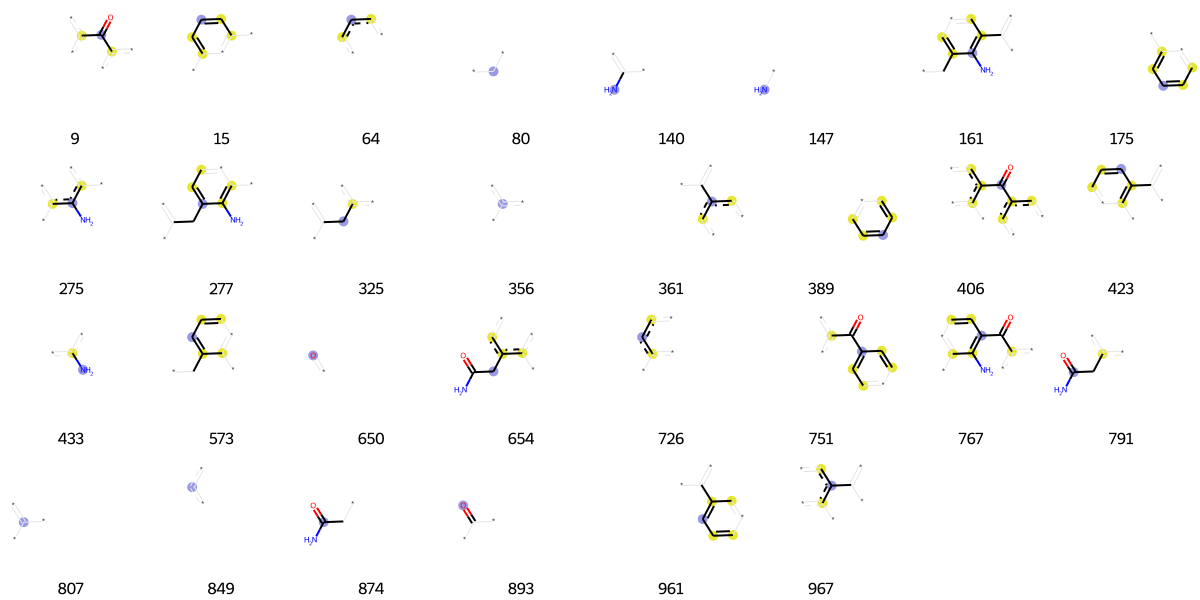

In [2122]:
prints = [(M19, x, bi) for x in fp19.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp19.GetOnBits ()])

In [2123]:
bi = {}

fp20= AllChem.GetMorganFingerprintAsBitVect(M20, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp20, fp_arr)
np.nonzero(fp_arr)
list(fp20.GetOnBits())

[9,
 26,
 32,
 87,
 90,
 94,
 95,
 104,
 115,
 128,
 136,
 178,
 200,
 205,
 216,
 246,
 261,
 293,
 301,
 315,
 333,
 350,
 356,
 378,
 380,
 421,
 428,
 433,
 441,
 452,
 456,
 463,
 477,
 503,
 511,
 551,
 585,
 586,
 601,
 650,
 699,
 714,
 726,
 739,
 757,
 783,
 806,
 807,
 816,
 827,
 832,
 833,
 849,
 855,
 856,
 875,
 879,
 893,
 904,
 926,
 935,
 967,
 976,
 986,
 1019]

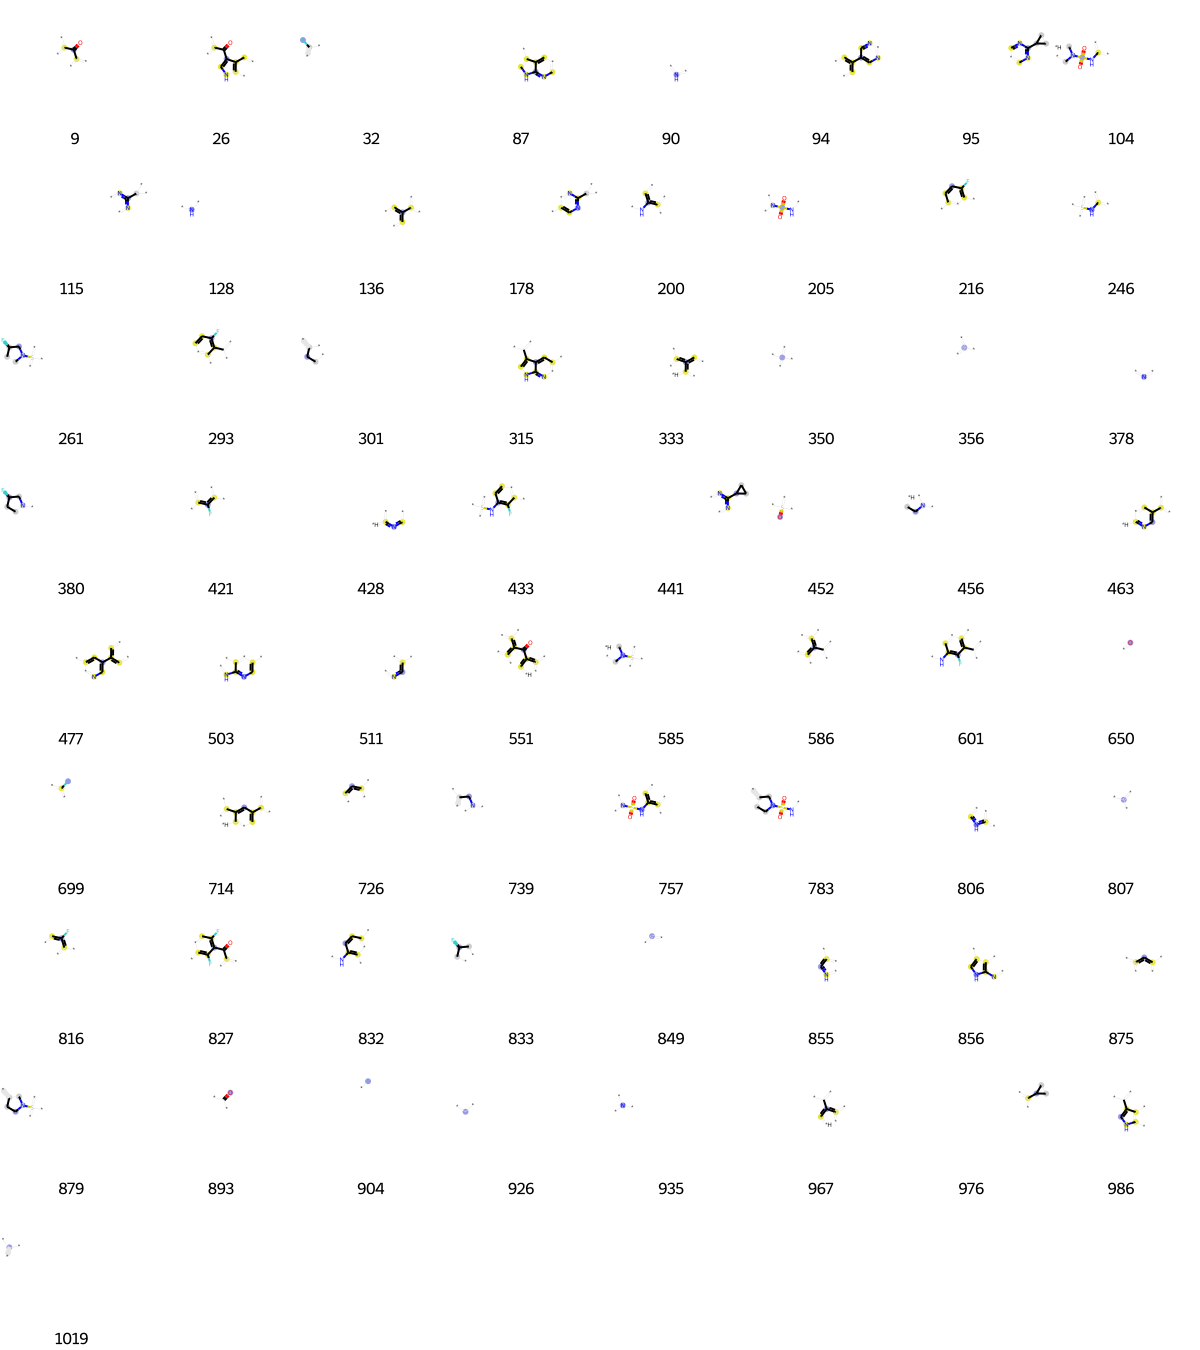

In [2124]:
prints = [(M20, x, bi) for x in fp20.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp20.GetOnBits ()])

In [2125]:
bi = {}

fp21= AllChem.GetMorganFingerprintAsBitVect(M21, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp21, fp_arr)
np.nonzero(fp_arr)
list(fp21.GetOnBits())

[33,
 65,
 80,
 102,
 107,
 189,
 310,
 322,
 356,
 360,
 400,
 428,
 512,
 654,
 674,
 695,
 718,
 726,
 730,
 745,
 781,
 790,
 831,
 841,
 849,
 868,
 984,
 1018]

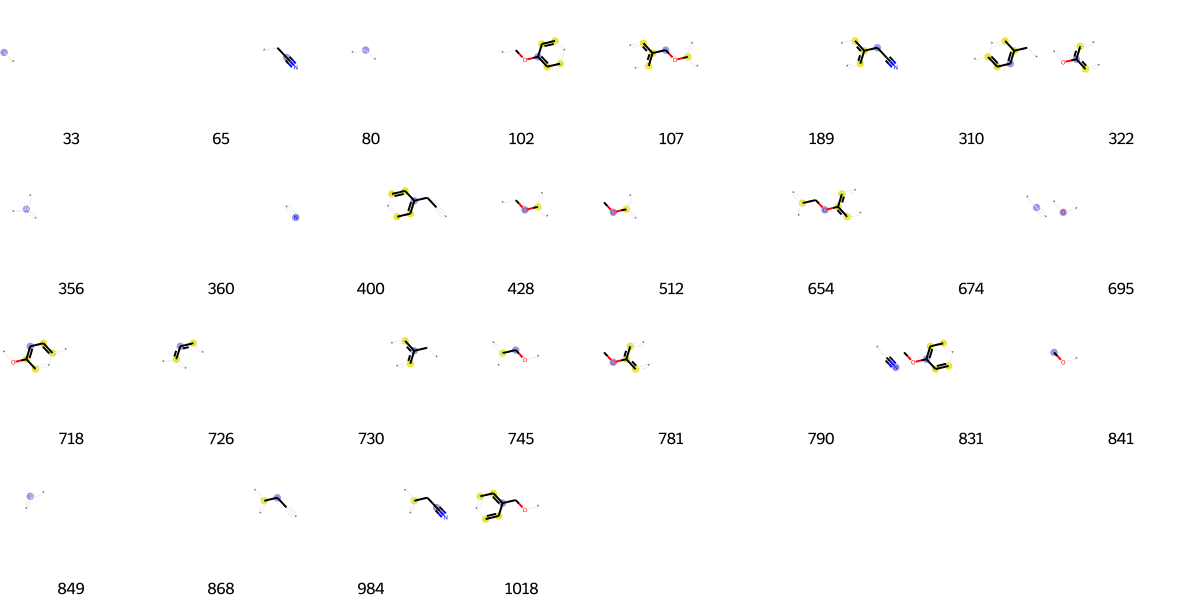

In [2126]:
prints = [(M21, x, bi) for x in fp21.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp21.GetOnBits ()])

In [2127]:
bi = {}

fp22= AllChem.GetMorganFingerprintAsBitVect(M22, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp22, fp_arr)
np.nonzero(fp_arr)
list(fp22.GetOnBits())

[6,
 66,
 123,
 134,
 212,
 231,
 255,
 289,
 356,
 381,
 441,
 513,
 578,
 656,
 726,
 745,
 754,
 779,
 783,
 790,
 807,
 825,
 849,
 875,
 881,
 899,
 926,
 956,
 976,
 1019]

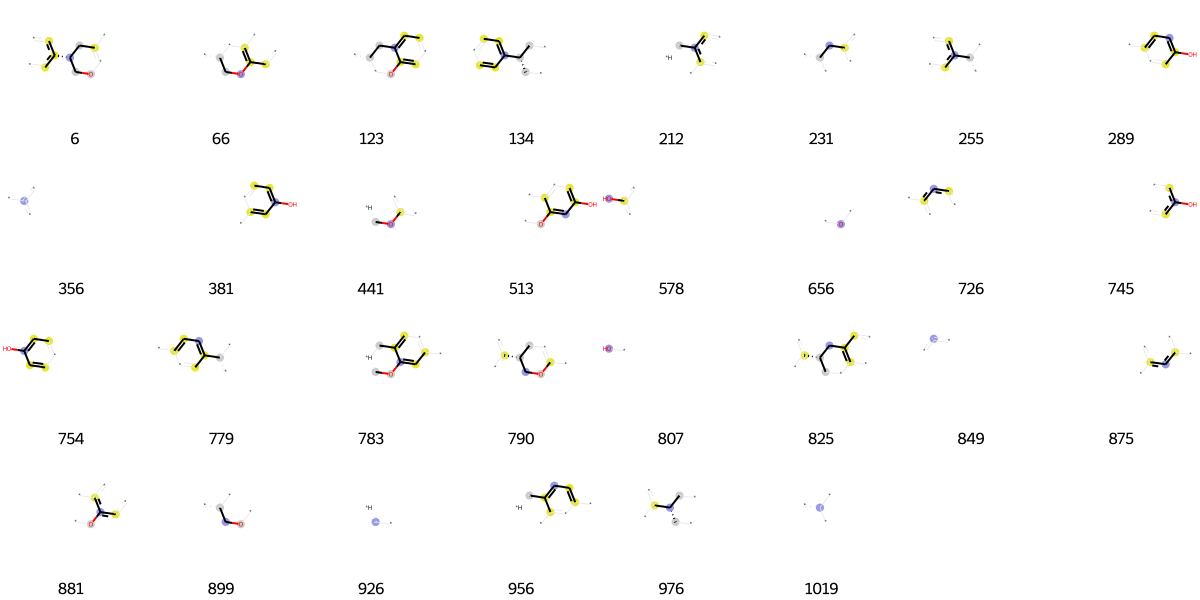

In [2128]:
prints = [(M22, x, bi) for x in fp22.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp22.GetOnBits ()])

In [2129]:
bi = {}

fp23= AllChem.GetMorganFingerprintAsBitVect(M23, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp23, fp_arr)
np.nonzero(fp_arr)
list(fp23.GetOnBits())

[4,
 14,
 33,
 64,
 74,
 77,
 80,
 112,
 121,
 128,
 139,
 143,
 175,
 207,
 212,
 271,
 319,
 350,
 356,
 397,
 446,
 452,
 456,
 458,
 561,
 588,
 592,
 623,
 650,
 653,
 675,
 686,
 688,
 692,
 715,
 726,
 744,
 763,
 767,
 785,
 804,
 807,
 815,
 849,
 875,
 881,
 887,
 917,
 926,
 935,
 949,
 1020]

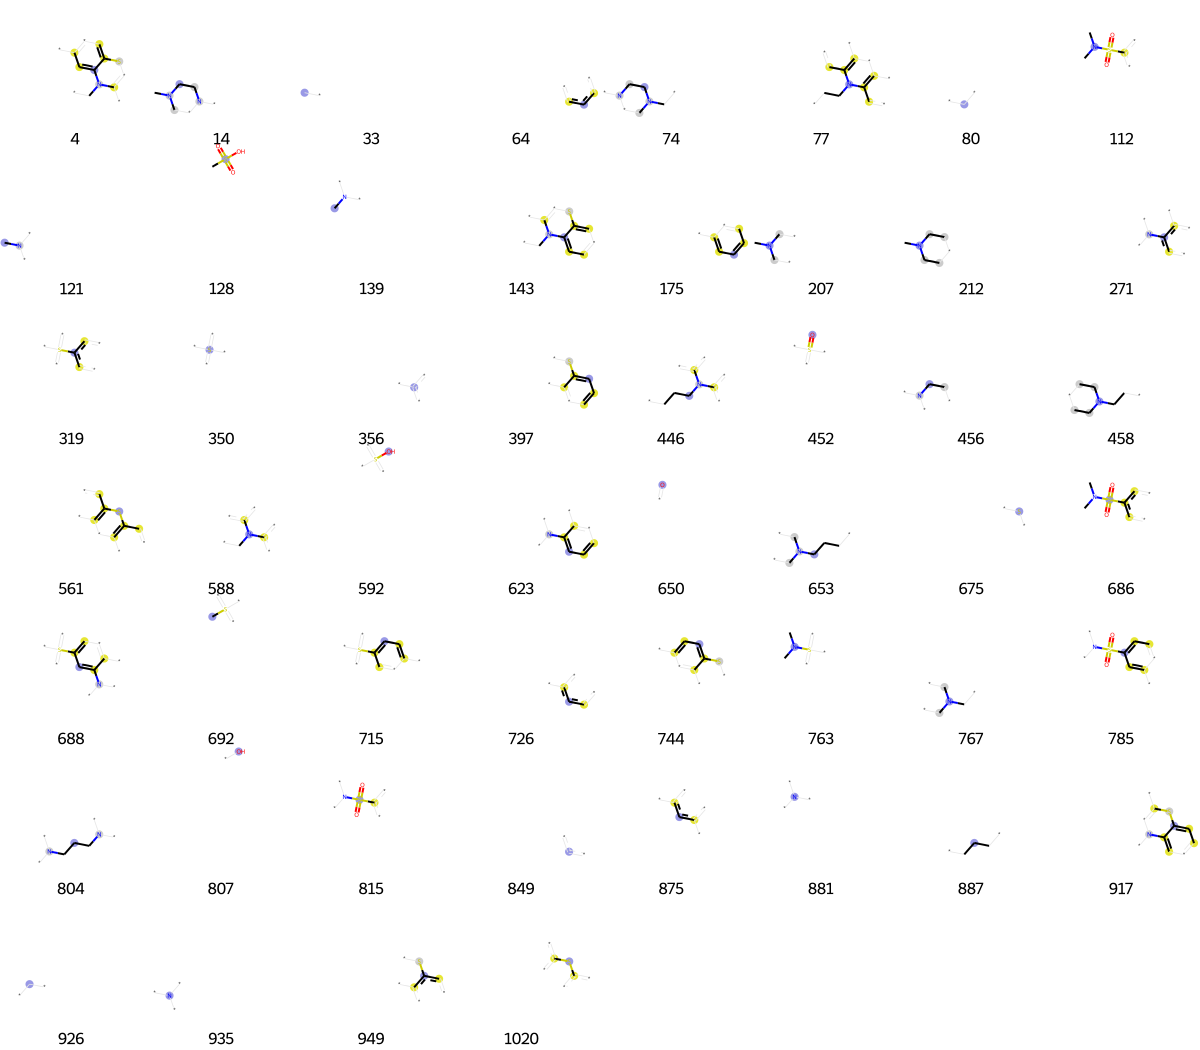

In [2130]:
prints = [(M23, x, bi) for x in fp23.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp23.GetOnBits ()])

In [2131]:
bi = {}

fp24= AllChem.GetMorganFingerprintAsBitVect(M24, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp24, fp_arr)
np.nonzero(fp_arr)
list(fp24.GetOnBits())

[4,
 19,
 33,
 64,
 128,
 157,
 191,
 200,
 246,
 289,
 319,
 322,
 350,
 356,
 378,
 428,
 448,
 452,
 491,
 500,
 502,
 512,
 578,
 598,
 650,
 672,
 695,
 708,
 715,
 718,
 726,
 745,
 754,
 766,
 781,
 807,
 831,
 841,
 842,
 843,
 849,
 883,
 888,
 925]

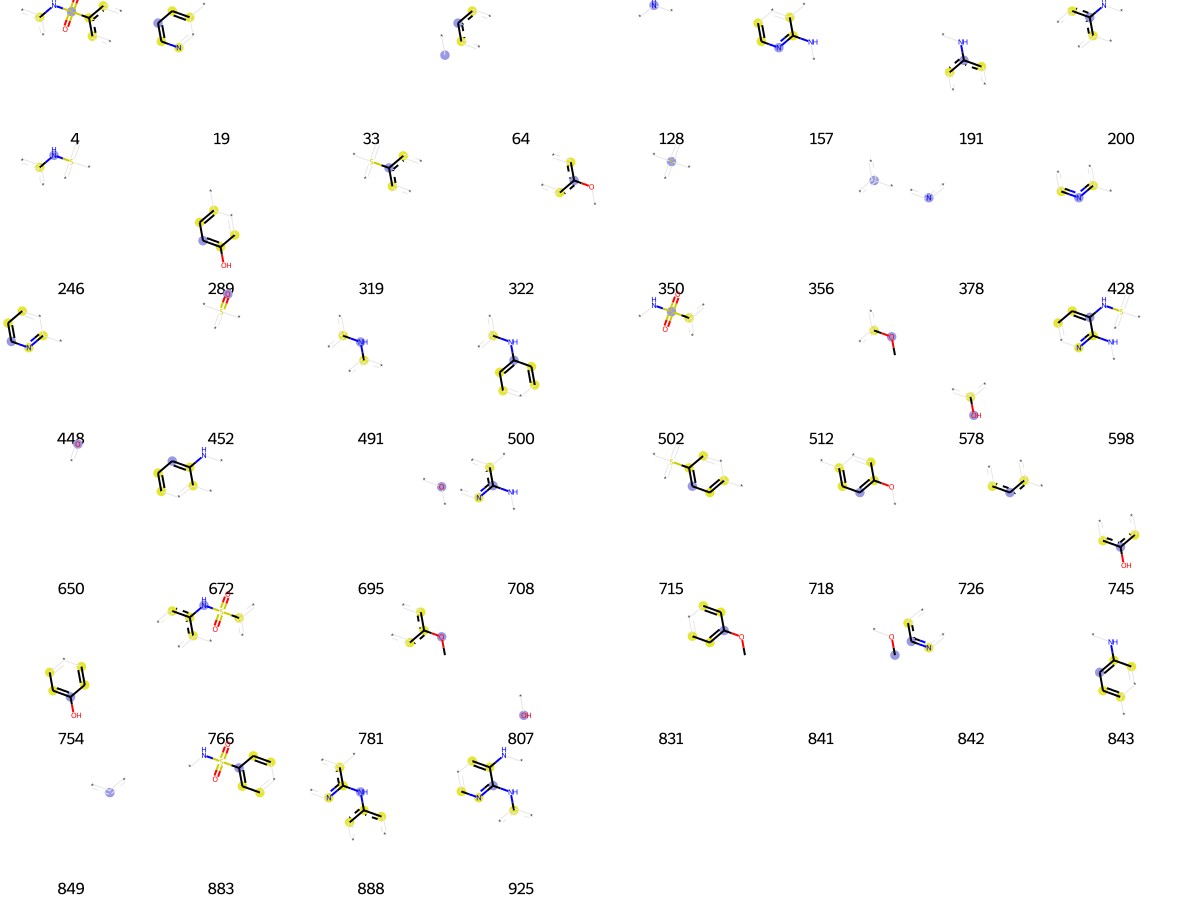

In [2132]:
prints = [(M24, x, bi) for x in fp24.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp24.GetOnBits ()])

In [2133]:
bi = {}

fp25= AllChem.GetMorganFingerprintAsBitVect(M25, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp25, fp_arr)
np.nonzero(fp_arr)
list(fp25.GetOnBits())

[33,
 80,
 113,
 139,
 140,
 147,
 248,
 351,
 360,
 512,
 514,
 603,
 623,
 629,
 725,
 807,
 881,
 973]

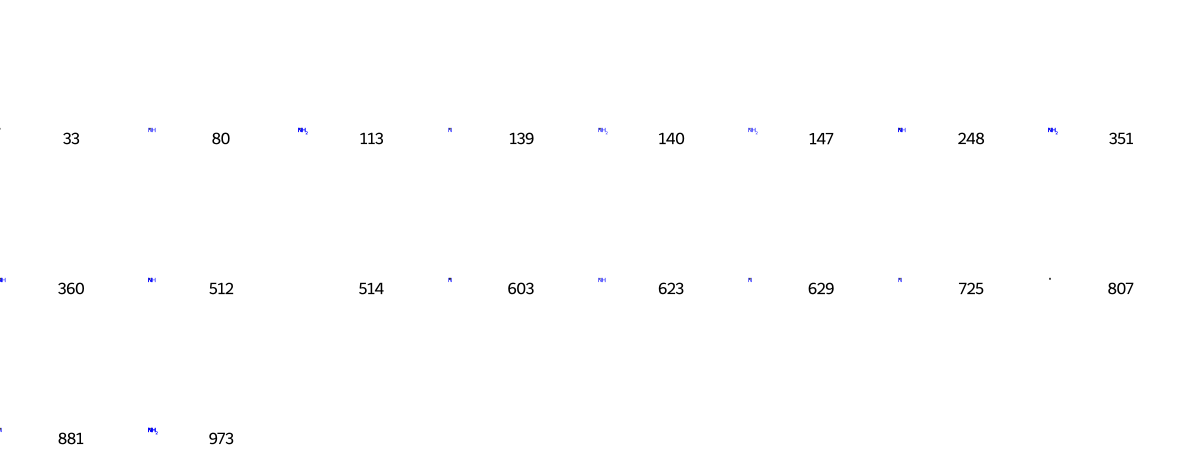

In [2134]:
prints = [(M25, x, bi) for x in fp25.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp25.GetOnBits ()])

In [2135]:
bi = {}

fp26= AllChem.GetMorganFingerprintAsBitVect(M26, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp26, fp_arr)
np.nonzero(fp_arr)
list(fp26.GetOnBits())

[14,
 33,
 64,
 74,
 80,
 96,
 112,
 118,
 121,
 139,
 170,
 173,
 175,
 207,
 212,
 277,
 288,
 319,
 350,
 352,
 356,
 357,
 397,
 401,
 452,
 456,
 458,
 561,
 650,
 675,
 686,
 694,
 715,
 726,
 744,
 763,
 767,
 770,
 785,
 815,
 849,
 875,
 881,
 926,
 935,
 949,
 984,
 1005,
 1020]

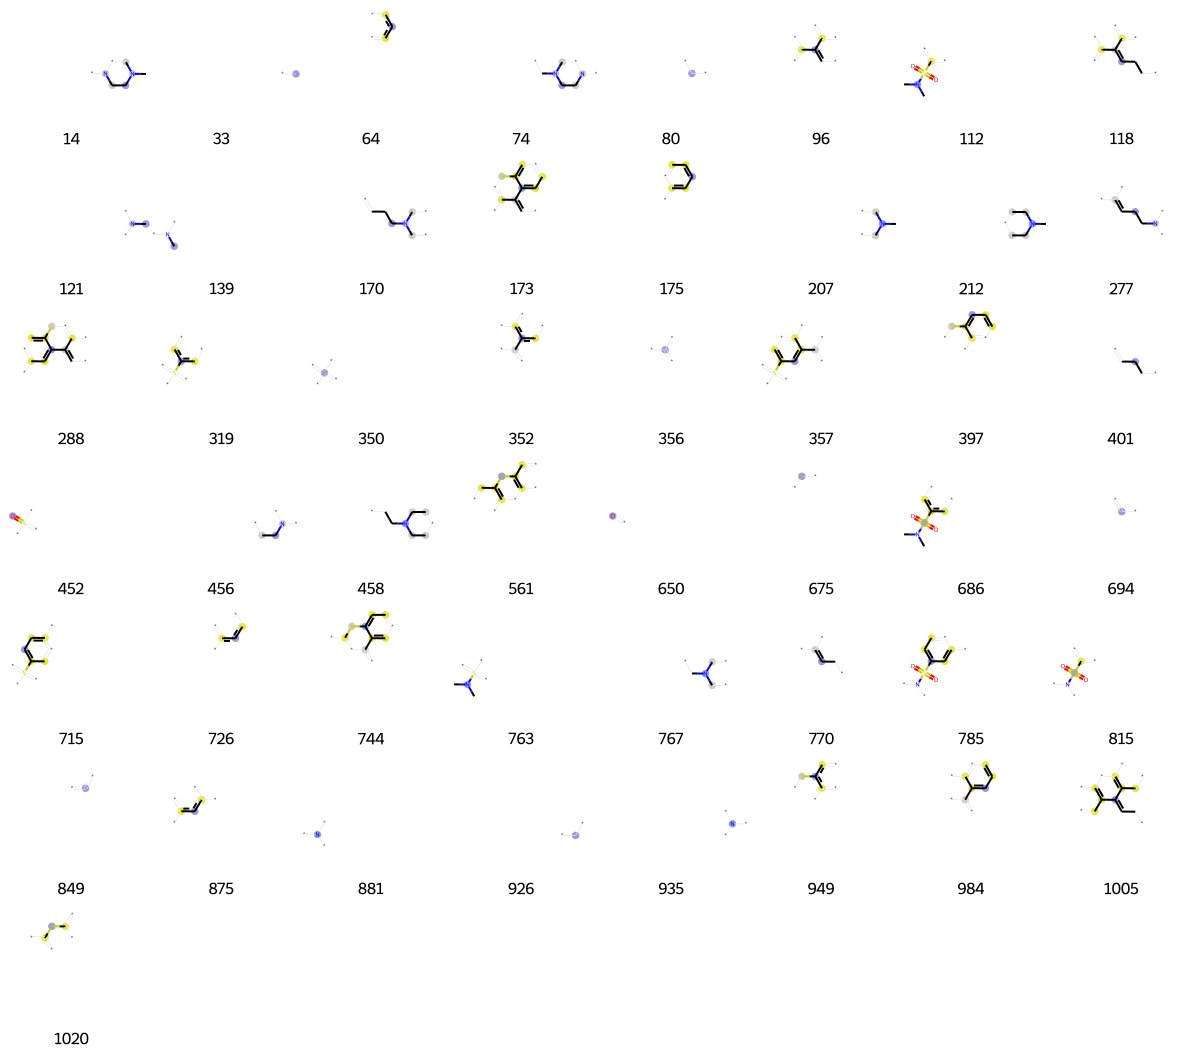

In [2136]:
prints = [(M26, x, bi) for x in fp26.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp26.GetOnBits ()])

In [2137]:
bi = {}

fp27= AllChem.GetMorganFingerprintAsBitVect(M27, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp27, fp_arr)
np.nonzero(fp_arr)
list(fp27.GetOnBits())

[1,
 33,
 117,
 128,
 132,
 147,
 192,
 283,
 478,
 486,
 573,
 605,
 616,
 650,
 769,
 786,
 807,
 814,
 881,
 893,
 931,
 986]

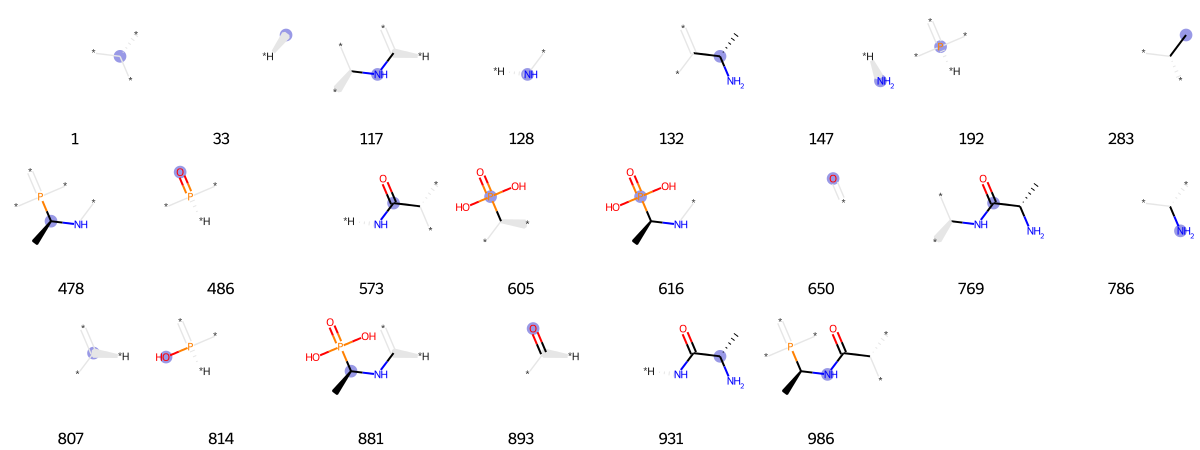

In [2138]:
prints = [(M27, x, bi) for x in fp27.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp27.GetOnBits ()])

In [2139]:
bi = {}

fp28= AllChem.GetMorganFingerprintAsBitVect(M28, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp28, fp_arr)
np.nonzero(fp_arr)
list(fp28.GetOnBits())

[9,
 15,
 64,
 80,
 147,
 161,
 175,
 189,
 202,
 275,
 277,
 284,
 325,
 356,
 361,
 389,
 406,
 423,
 433,
 573,
 650,
 715,
 726,
 751,
 767,
 785,
 807,
 849,
 857,
 893,
 961,
 967]

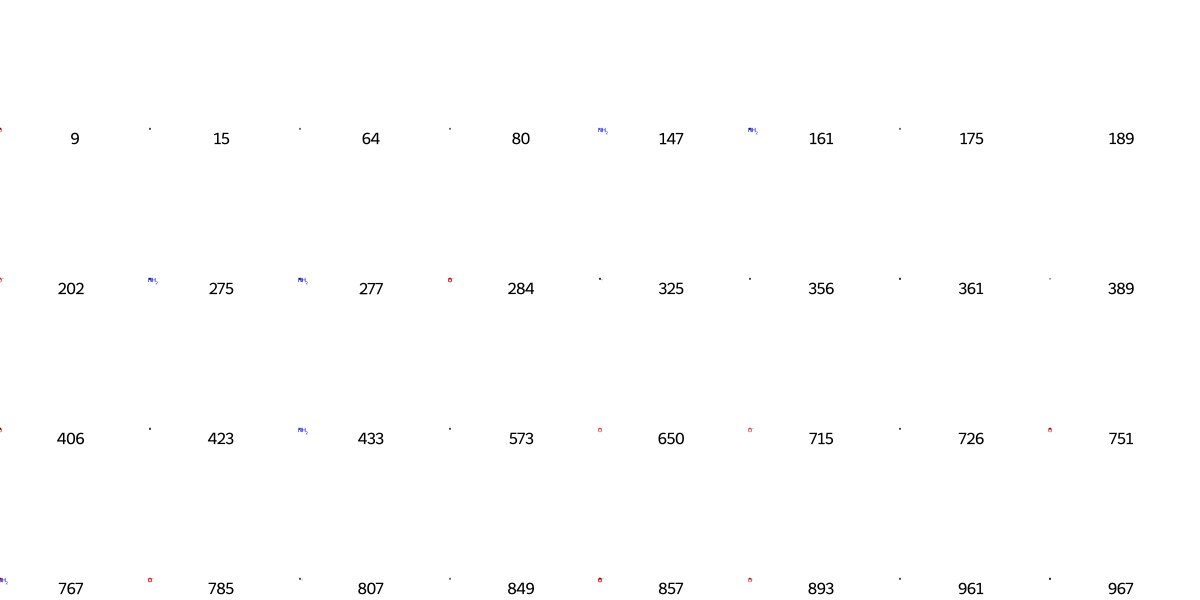

In [2140]:
prints = [(M28, x, bi) for x in fp28.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp28.GetOnBits ()])

In [2141]:
bi = {}

fp29= AllChem.GetMorganFingerprintAsBitVect(M29, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp29, fp_arr)
np.nonzero(fp_arr)
list(fp29.GetOnBits())

[0,
 33,
 50,
 80,
 92,
 116,
 156,
 202,
 222,
 246,
 284,
 325,
 356,
 378,
 409,
 428,
 511,
 578,
 698,
 722,
 762,
 807,
 837,
 849,
 938,
 967,
 1010]

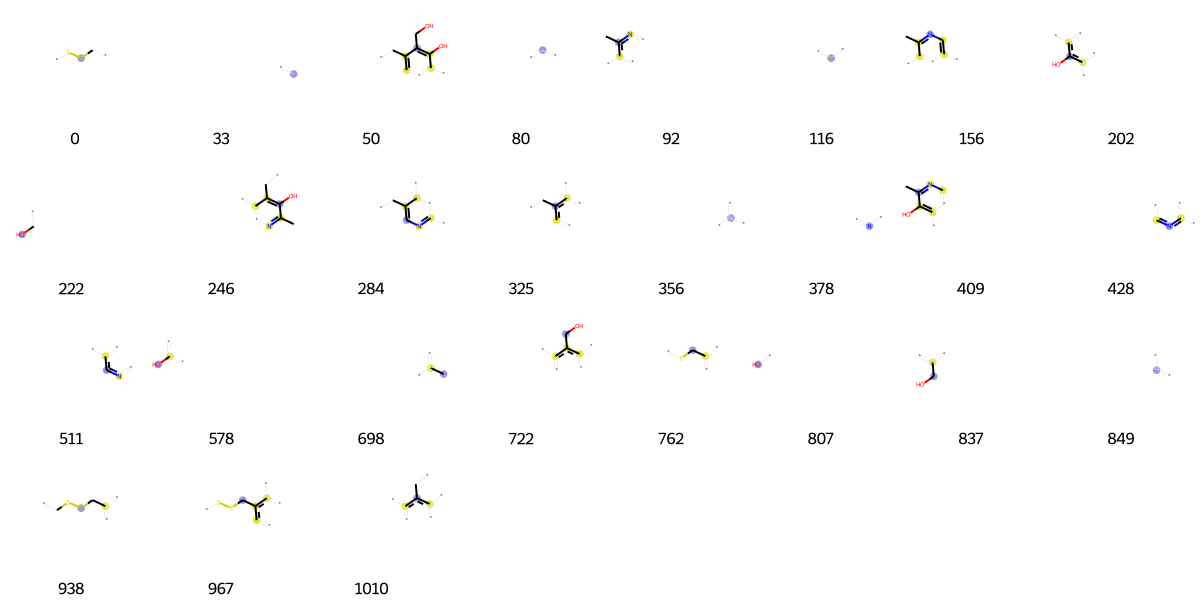

In [2142]:
prints = [(M29, x, bi) for x in fp29.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp29.GetOnBits ()])

In [2143]:
bi = {}

fp30= AllChem.GetMorganFingerprintAsBitVect(M30, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp30, fp_arr)
np.nonzero(fp_arr)
list(fp30.GetOnBits())

[22,
 53,
 80,
 128,
 191,
 268,
 272,
 356,
 387,
 422,
 470,
 503,
 544,
 570,
 573,
 585,
 590,
 623,
 661,
 723,
 726,
 742,
 792,
 807,
 827,
 843,
 849,
 926,
 947,
 952,
 994,
 1019]

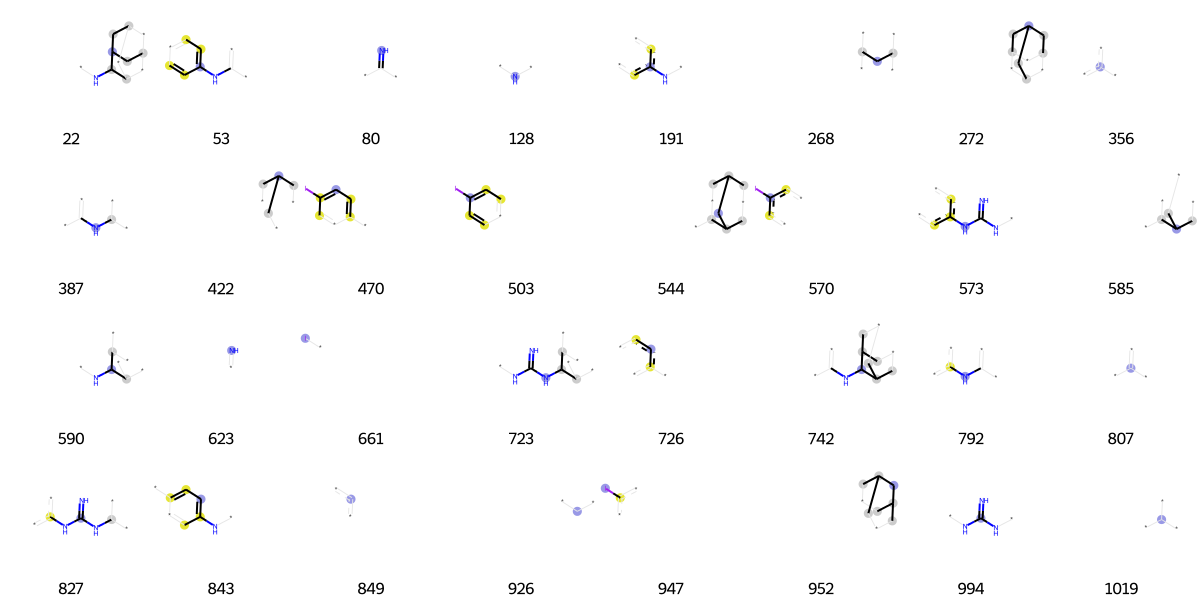

In [2144]:
prints = [(M30, x, bi) for x in fp30.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp30.GetOnBits ()])

In [2145]:
bi = {}

fp31= AllChem.GetMorganFingerprintAsBitVect(M31, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp31, fp_arr)
np.nonzero(fp_arr)
list(fp31.GetOnBits())

[33,
 90,
 94,
 128,
 157,
 162,
 165,
 191,
 216,
 230,
 231,
 246,
 249,
 252,
 271,
 284,
 305,
 318,
 330,
 333,
 350,
 356,
 403,
 407,
 452,
 456,
 492,
 502,
 512,
 561,
 650,
 659,
 675,
 695,
 698,
 703,
 720,
 726,
 743,
 744,
 804,
 816,
 841,
 843,
 849,
 851,
 852,
 862,
 875,
 885,
 915,
 926,
 935,
 946,
 996,
 1002]

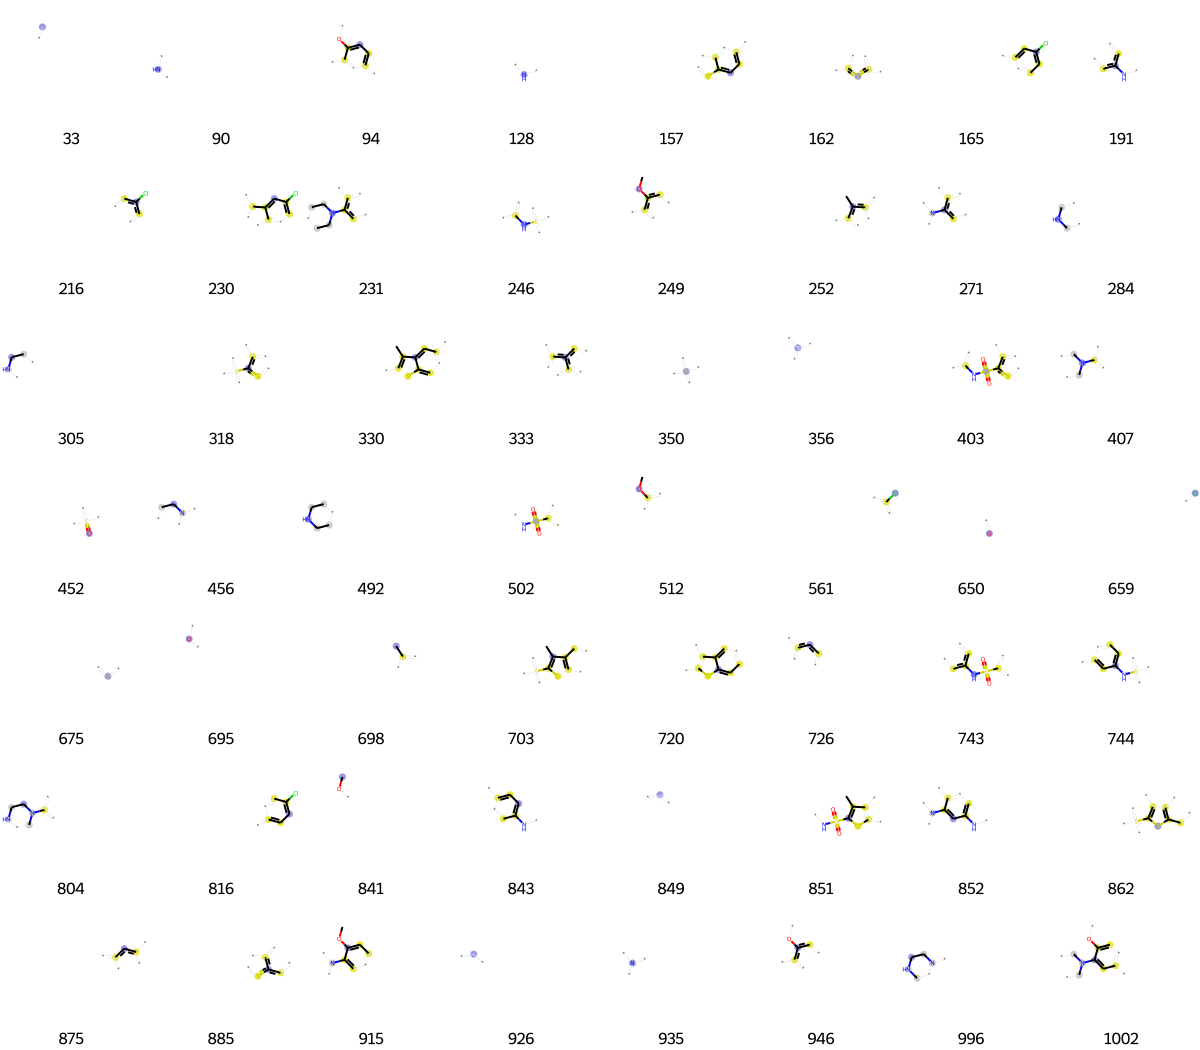

In [2146]:
prints = [(M31, x, bi) for x in fp31.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp31.GetOnBits ()])

In [2147]:
bi = {}

fp32= AllChem.GetMorganFingerprintAsBitVect(M32, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp32, fp_arr)
np.nonzero(fp_arr)
list(fp32.GetOnBits())

[36,
 64,
 90,
 95,
 119,
 136,
 175,
 216,
 222,
 258,
 275,
 289,
 314,
 333,
 352,
 356,
 381,
 387,
 389,
 396,
 430,
 510,
 578,
 602,
 633,
 650,
 721,
 723,
 726,
 736,
 745,
 807,
 834,
 849,
 863,
 875,
 910,
 915,
 960]

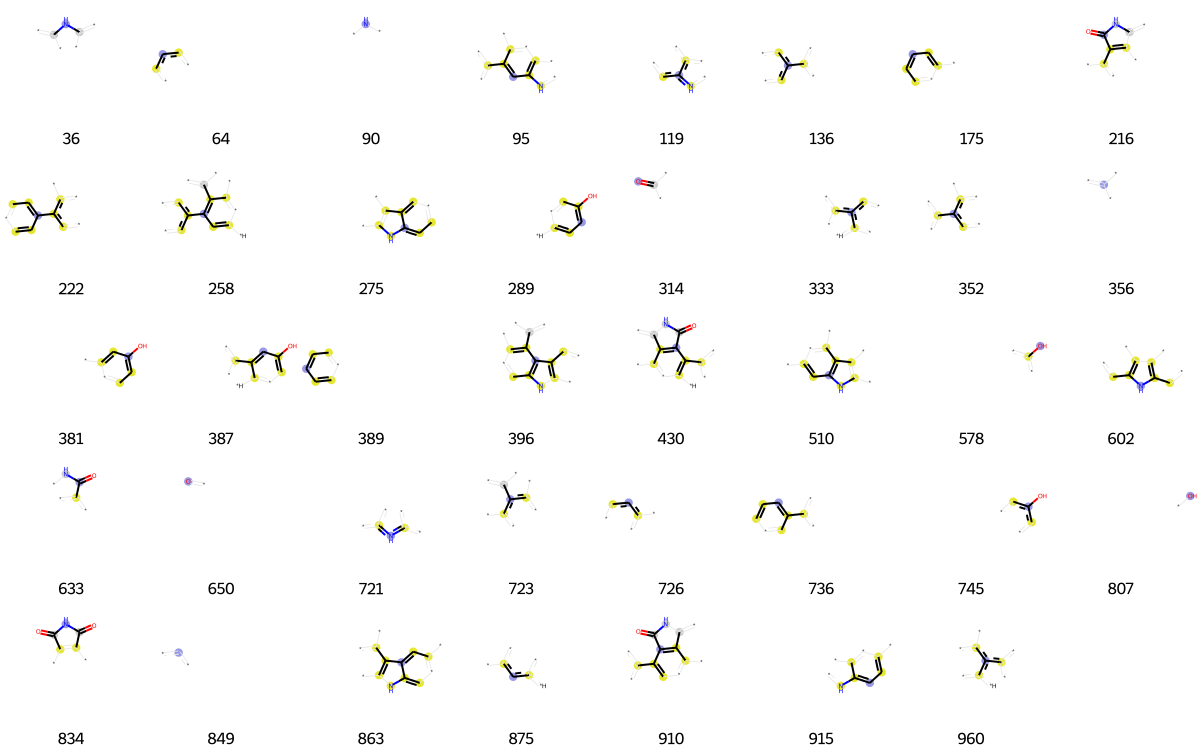

In [2148]:
prints = [(M32, x, bi) for x in fp32.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp32.GetOnBits ()])

In [2149]:
bi = {}

fp33= AllChem.GetMorganFingerprintAsBitVect(M33, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp33, fp_arr)
np.nonzero(fp_arr)
list(fp33.GetOnBits())

[1,
 14,
 27,
 71,
 80,
 118,
 128,
 161,
 191,
 200,
 212,
 222,
 227,
 272,
 314,
 322,
 329,
 352,
 356,
 386,
 421,
 428,
 452,
 459,
 463,
 477,
 482,
 491,
 526,
 641,
 646,
 650,
 658,
 680,
 695,
 699,
 714,
 718,
 726,
 754,
 789,
 807,
 816,
 819,
 832,
 843,
 849,
 875,
 891,
 901,
 904,
 926,
 953,
 956,
 1014]

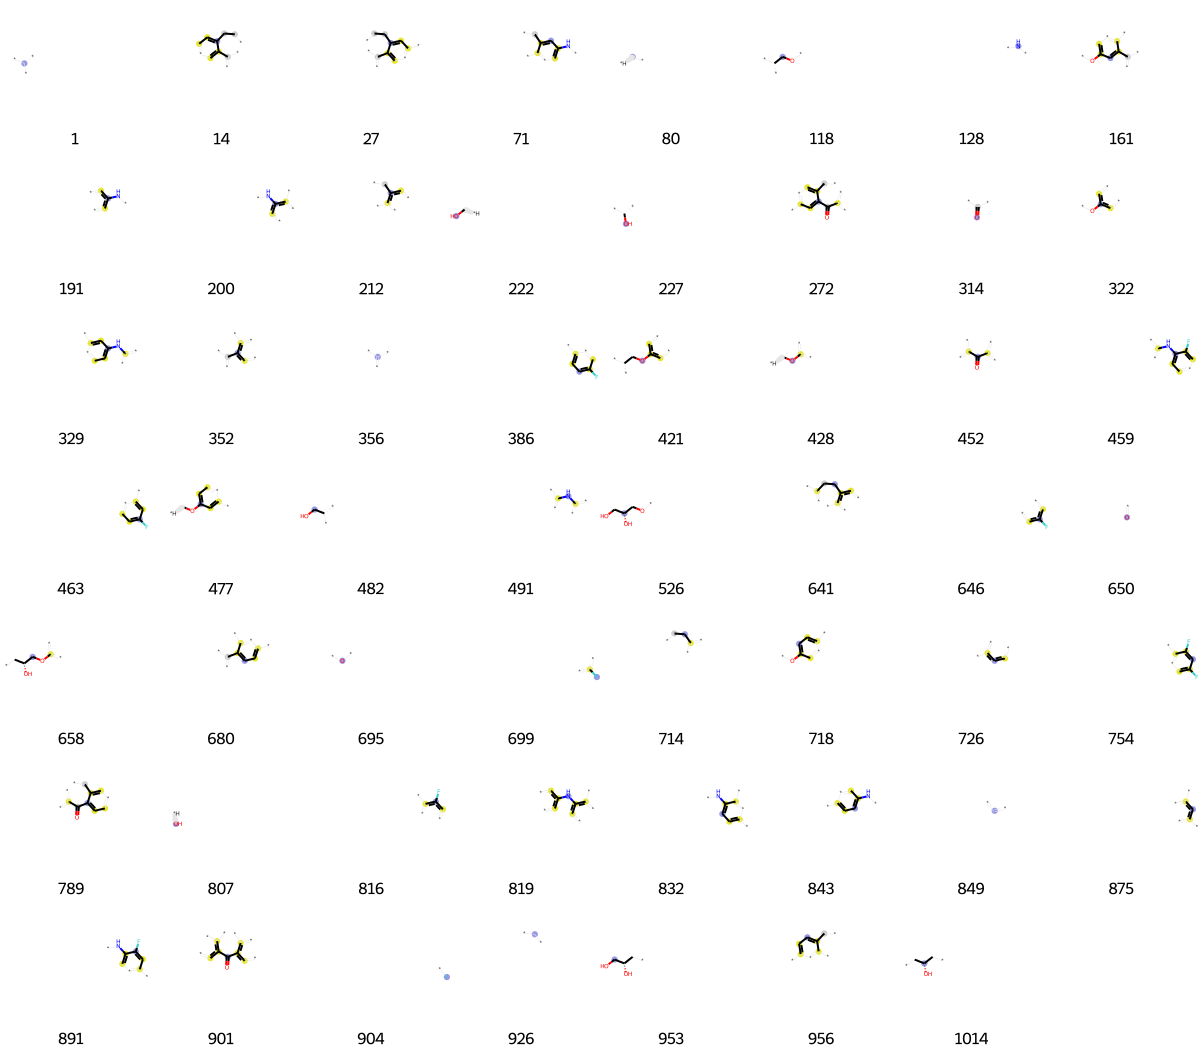

In [2150]:
prints = [(M33, x, bi) for x in fp33.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp33.GetOnBits ()])

In [2151]:
bi = {}

fp34= AllChem.GetMorganFingerprintAsBitVect(M34, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp34, fp_arr)
np.nonzero(fp_arr)
list(fp34.GetOnBits())

[1,
 11,
 46,
 80,
 110,
 114,
 136,
 140,
 147,
 188,
 213,
 216,
 221,
 246,
 250,
 284,
 319,
 325,
 350,
 356,
 361,
 378,
 411,
 428,
 429,
 452,
 464,
 495,
 507,
 516,
 518,
 534,
 552,
 560,
 561,
 616,
 625,
 633,
 650,
 656,
 659,
 699,
 715,
 717,
 726,
 739,
 772,
 784,
 807,
 815,
 816,
 849,
 875,
 881,
 885,
 893,
 896,
 904,
 922,
 941]

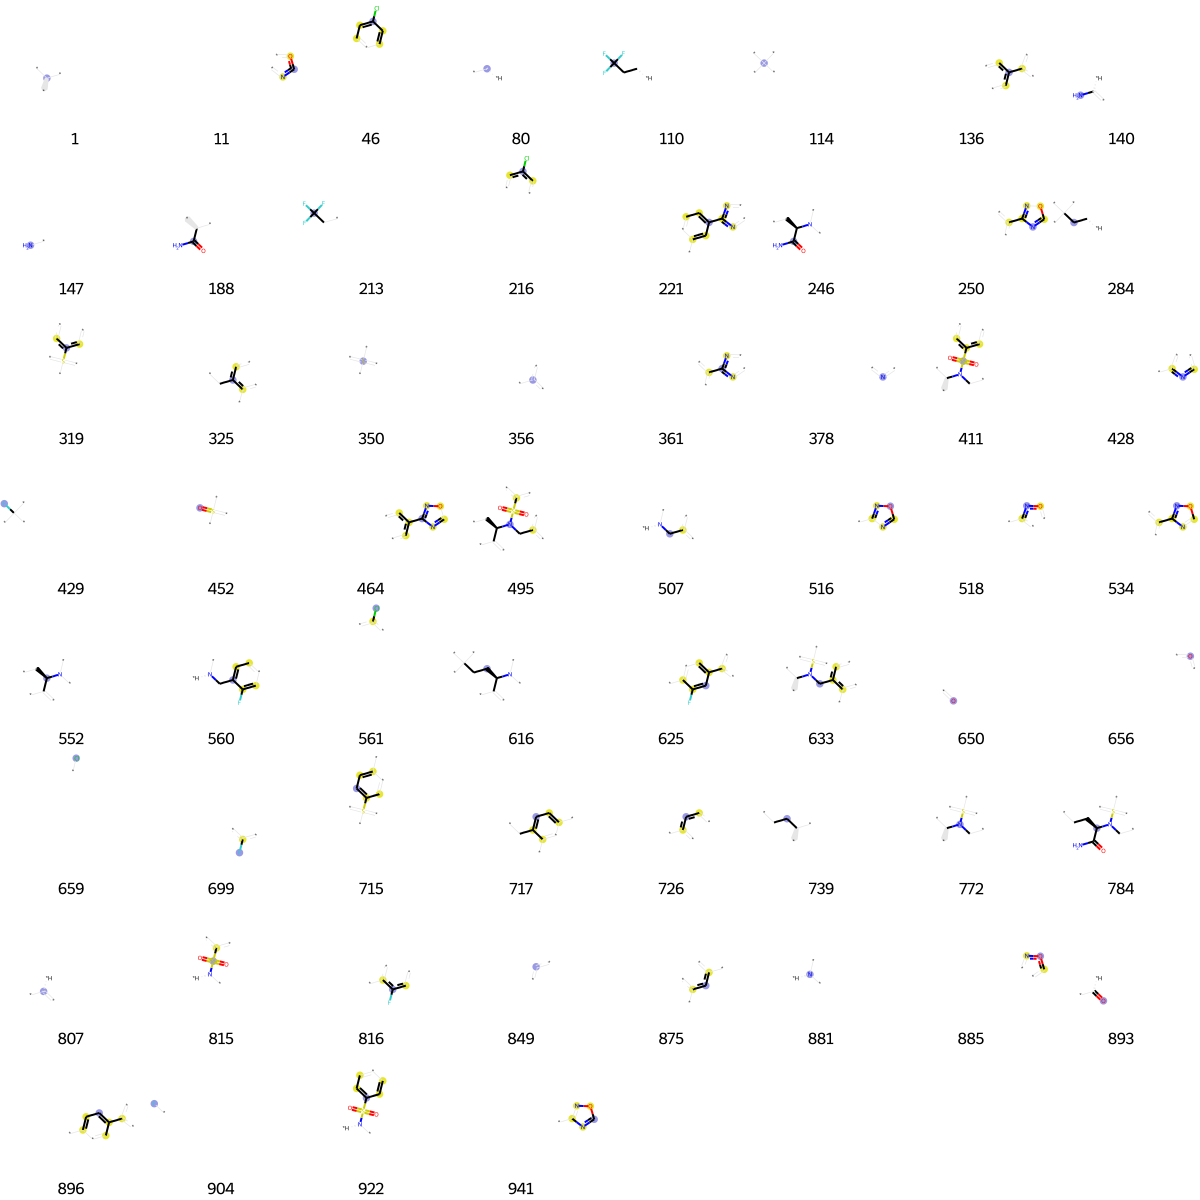

In [2152]:
prints = [(M34, x, bi) for x in fp34.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp34.GetOnBits ()])

In [2153]:
bi = {}

fp35= AllChem.GetMorganFingerprintAsBitVect(M35, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp35, fp_arr)
np.nonzero(fp_arr)
list(fp35.GetOnBits())

[0,
 33,
 64,
 74,
 80,
 84,
 90,
 119,
 175,
 216,
 301,
 310,
 314,
 333,
 356,
 362,
 378,
 384,
 406,
 456,
 480,
 537,
 549,
 650,
 652,
 695,
 699,
 716,
 726,
 730,
 750,
 752,
 754,
 807,
 816,
 841,
 849,
 873,
 875,
 893,
 904,
 906,
 910,
 926,
 929,
 934,
 935,
 937,
 942,
 944,
 959,
 967,
 980,
 985,
 1002,
 1019]

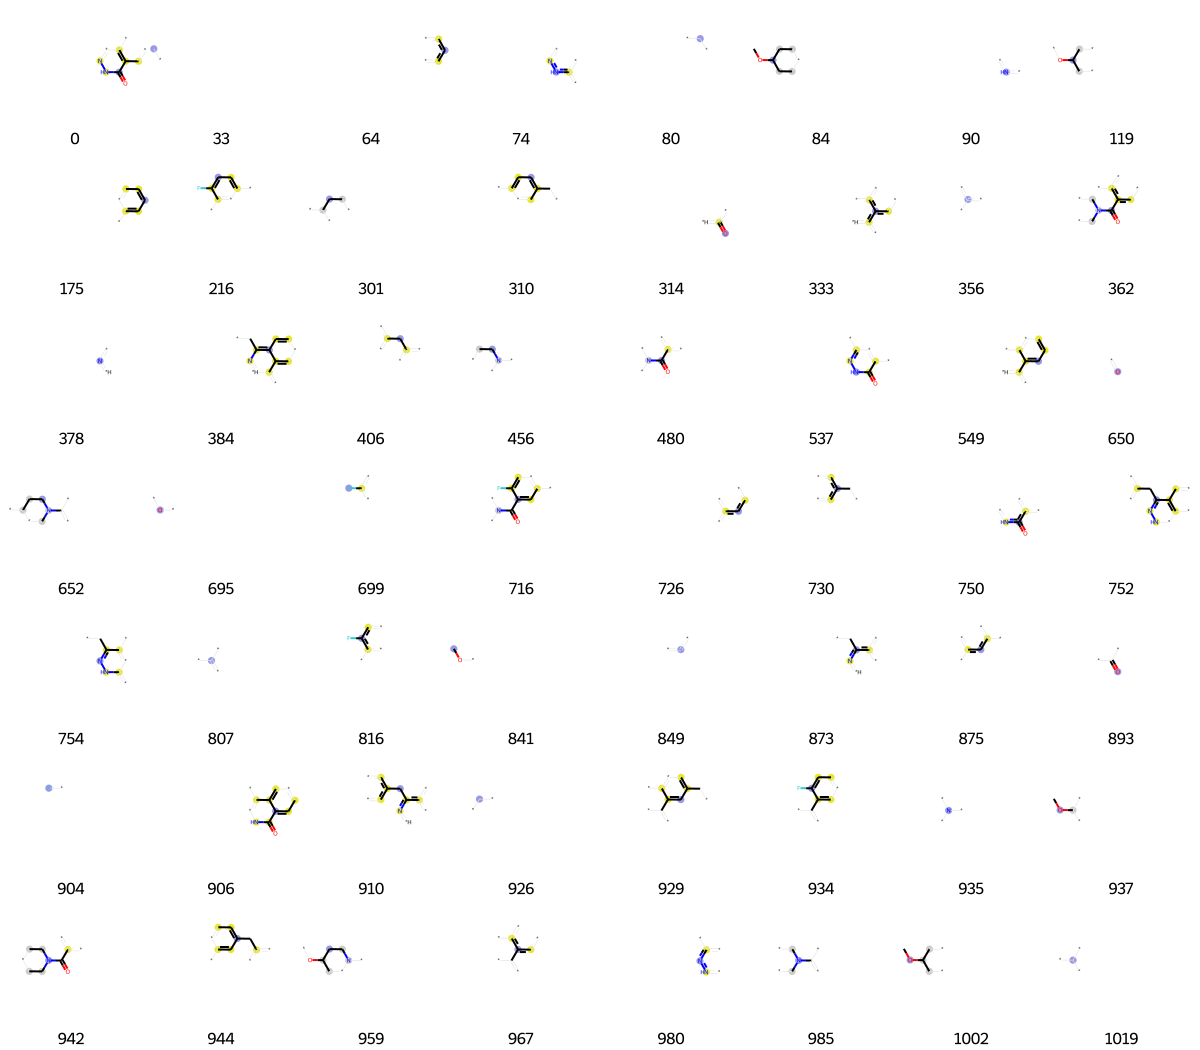

In [2154]:
prints = [(M35, x, bi) for x in fp35.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp35.GetOnBits ()])

In [2155]:
bi = {}

fp36= AllChem.GetMorganFingerprintAsBitVect(M36, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp36, fp_arr)
np.nonzero(fp_arr)
list(fp36.GetOnBits())

[1,
 3,
 33,
 64,
 112,
 114,
 117,
 128,
 139,
 171,
 172,
 175,
 283,
 356,
 365,
 379,
 389,
 392,
 393,
 406,
 442,
 446,
 460,
 480,
 483,
 488,
 512,
 573,
 625,
 650,
 658,
 659,
 694,
 726,
 728,
 745,
 749,
 790,
 807,
 809,
 833,
 847,
 849,
 881,
 883,
 893,
 906,
 993,
 1017]

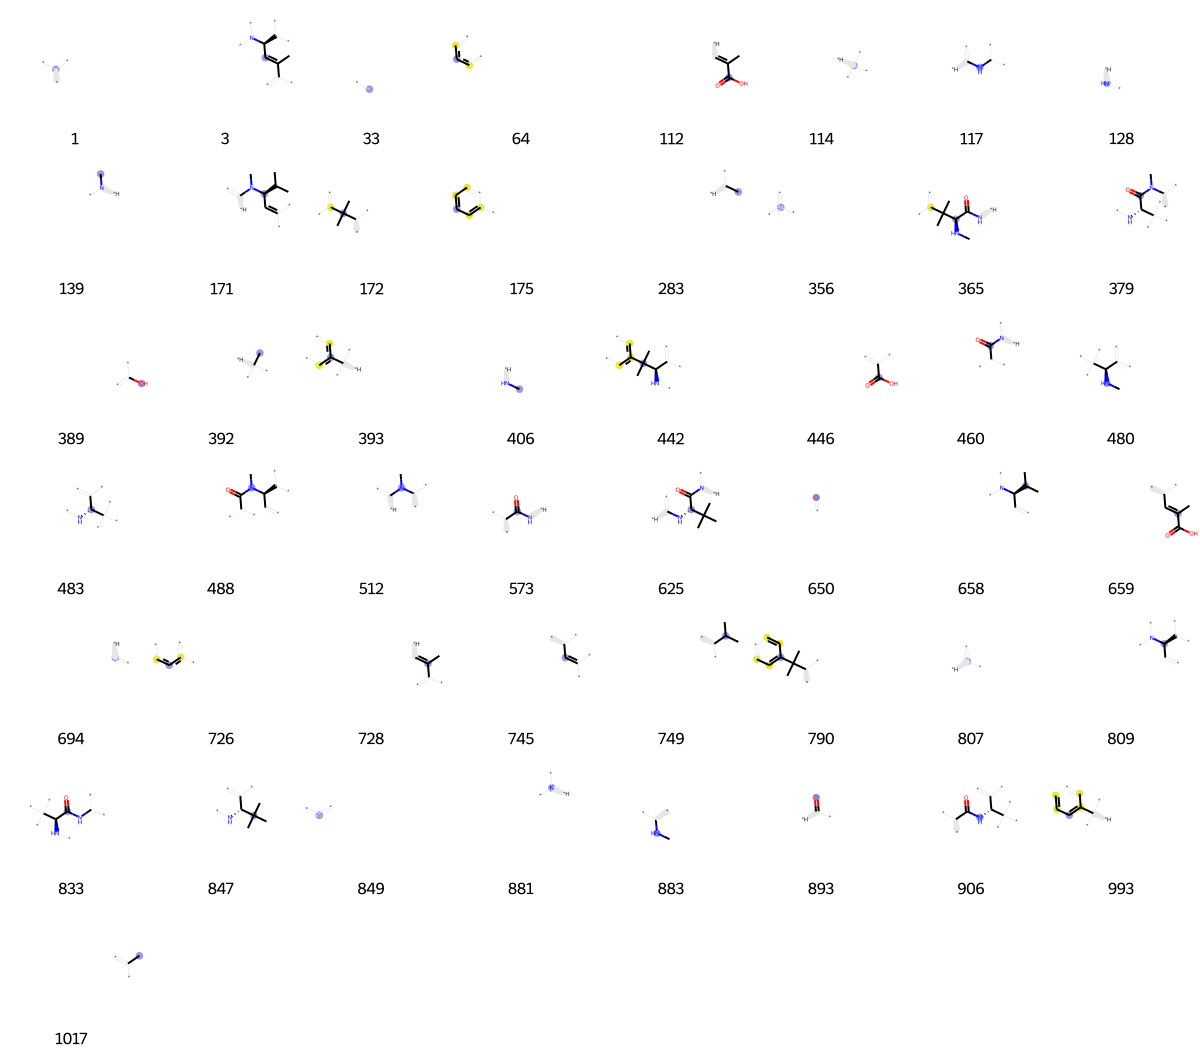

In [2156]:
prints = [(M36, x, bi) for x in fp36.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp36.GetOnBits ()])

In [2157]:
bi = {}

fp37= AllChem.GetMorganFingerprintAsBitVect(M37, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp37, fp_arr)
np.nonzero(fp_arr)
list(fp37.GetOnBits())

[8,
 10,
 13,
 15,
 33,
 34,
 45,
 64,
 73,
 80,
 102,
 121,
 127,
 128,
 147,
 150,
 184,
 191,
 214,
 244,
 294,
 311,
 322,
 323,
 331,
 346,
 356,
 361,
 378,
 381,
 386,
 417,
 428,
 433,
 435,
 449,
 456,
 458,
 486,
 511,
 518,
 523,
 533,
 546,
 562,
 593,
 641,
 650,
 656,
 673,
 695,
 698,
 703,
 718,
 726,
 738,
 744,
 749,
 767,
 771,
 772,
 786,
 792,
 802,
 807,
 808,
 825,
 831,
 849,
 850,
 870,
 875,
 891,
 893,
 925,
 926,
 935,
 950,
 954]

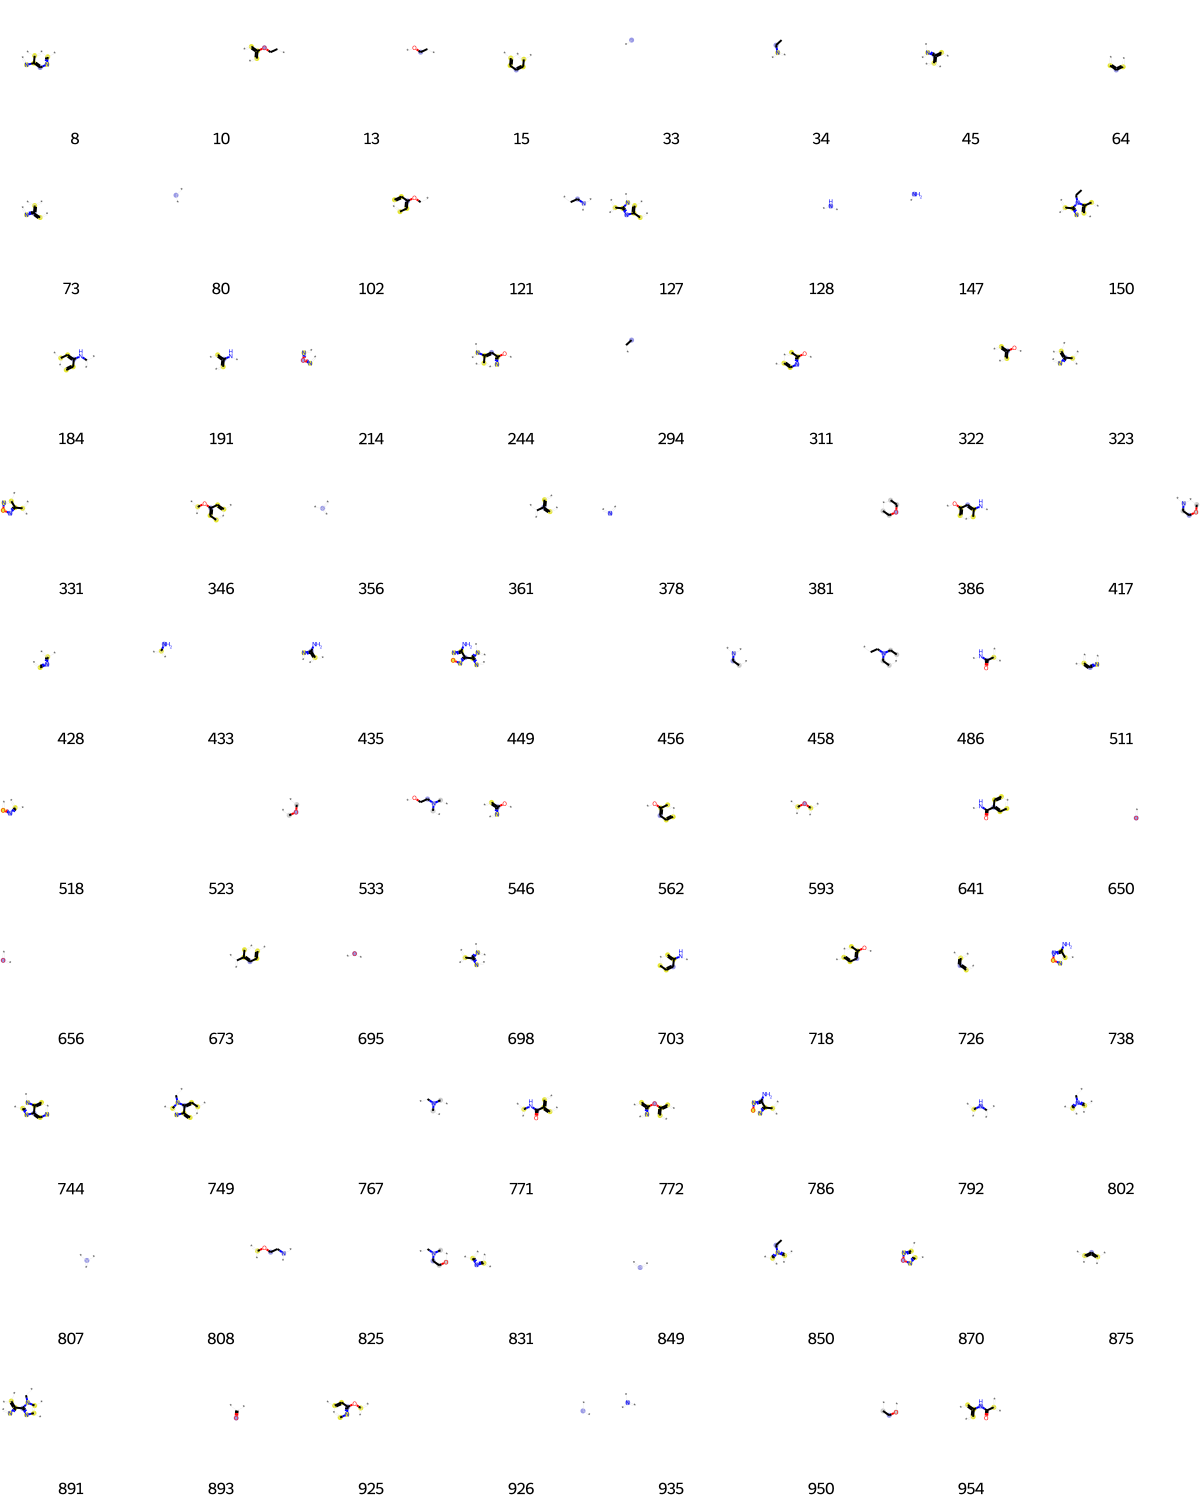

In [2158]:
prints = [(M37, x, bi) for x in fp37.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp37.GetOnBits ()])

In [2159]:
bi = {}

fp38= AllChem.GetMorganFingerprintAsBitVect(M38, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp38, fp_arr)
np.nonzero(fp_arr)
list(fp38.GetOnBits())

[31,
 33,
 80,
 96,
 101,
 173,
 233,
 237,
 295,
 357,
 385,
 389,
 401,
 432,
 441,
 476,
 479,
 488,
 540,
 550,
 558,
 602,
 642,
 650,
 690,
 694,
 718,
 807,
 893,
 945,
 976,
 1017]

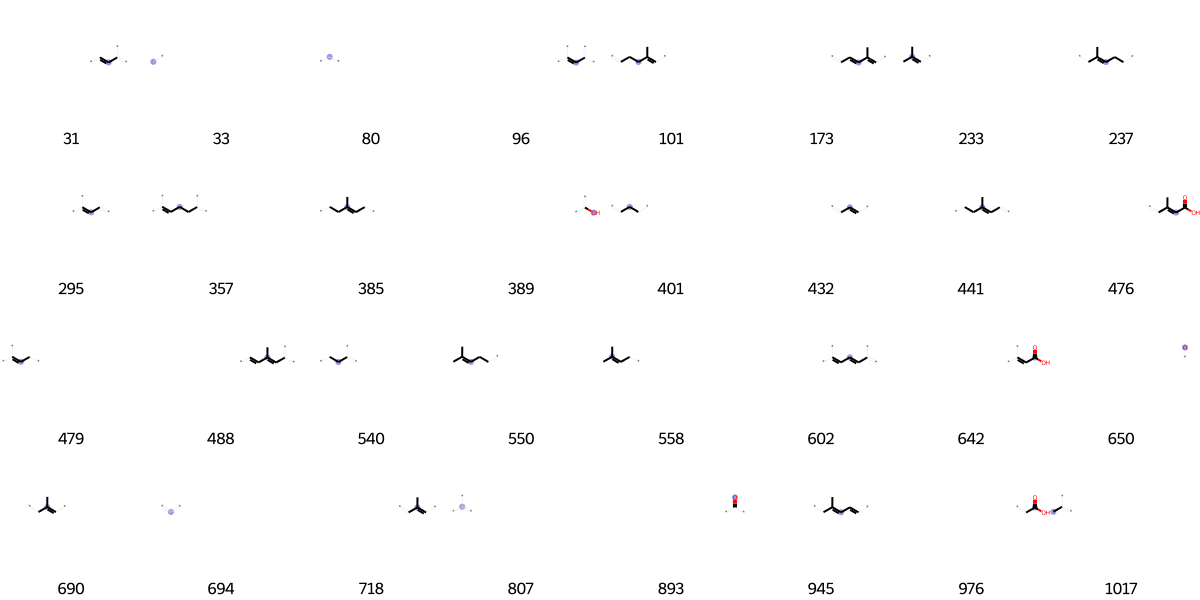

In [2160]:
prints = [(M38, x, bi) for x in fp38.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp38.GetOnBits ()])

In [2161]:
bi = {}

fp40= AllChem.GetMorganFingerprintAsBitVect(M40, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp40, fp_arr)
np.nonzero(fp_arr)
list(fp40.GetOnBits())

[15,
 31,
 33,
 64,
 117,
 128,
 136,
 140,
 184,
 191,
 240,
 242,
 329,
 356,
 378,
 383,
 385,
 491,
 543,
 552,
 579,
 675,
 698,
 702,
 703,
 726,
 728,
 799,
 831,
 842,
 849,
 875,
 947,
 980,
 1013]

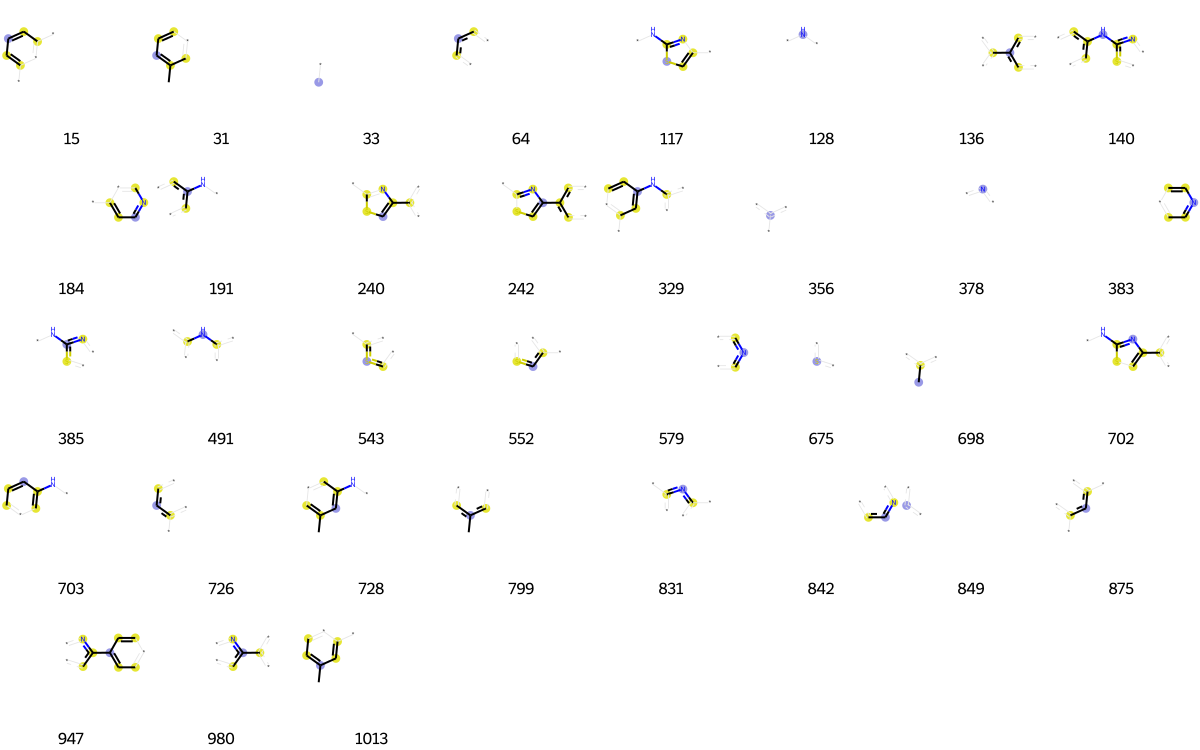

In [2162]:
prints = [(M40, x, bi) for x in fp40.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp40.GetOnBits ()])

In [2163]:
bi = {}

fp41= AllChem.GetMorganFingerprintAsBitVect(M41, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp41, fp_arr)
np.nonzero(fp_arr)
list(fp41.GetOnBits())

[15,
 33,
 64,
 80,
 94,
 97,
 110,
 114,
 139,
 145,
 166,
 216,
 249,
 254,
 299,
 333,
 334,
 349,
 356,
 389,
 423,
 429,
 494,
 512,
 549,
 556,
 605,
 650,
 695,
 709,
 713,
 726,
 807,
 809,
 841,
 849,
 854,
 858,
 881,
 893,
 904,
 926,
 945,
 946,
 967]

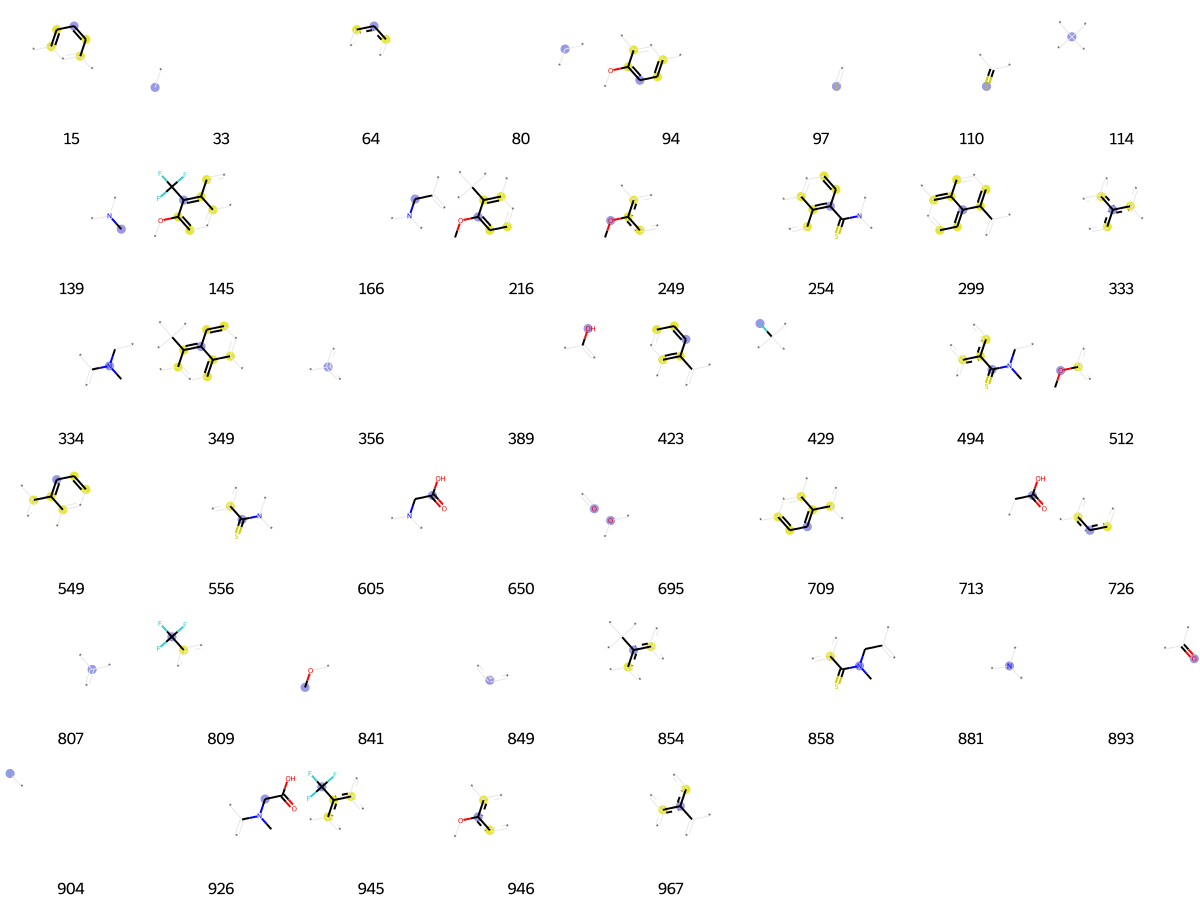

In [2164]:
prints = [(M41, x, bi) for x in fp41.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp41.GetOnBits ()])

In [2165]:
bi = {}

fp42= AllChem.GetMorganFingerprintAsBitVect(M42, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp42, fp_arr)
np.nonzero(fp_arr)
list(fp42.GetOnBits())

[1,
 33,
 90,
 119,
 134,
 147,
 149,
 157,
 186,
 209,
 231,
 267,
 283,
 286,
 289,
 300,
 305,
 307,
 309,
 323,
 351,
 356,
 378,
 381,
 396,
 428,
 433,
 435,
 489,
 548,
 578,
 672,
 721,
 726,
 745,
 786,
 793,
 807,
 831,
 849,
 875,
 915,
 932,
 935,
 960,
 1005]

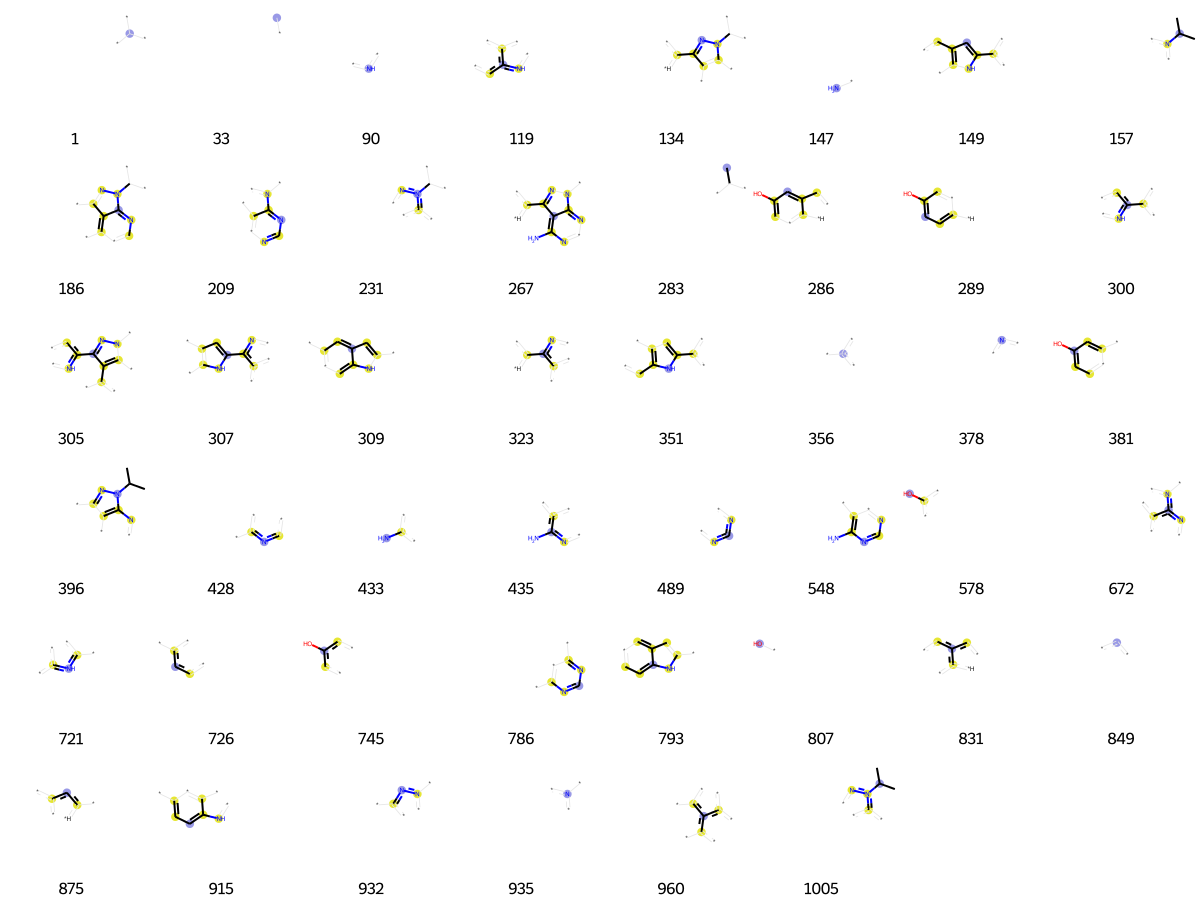

In [2166]:
prints = [(M42, x, bi) for x in fp42.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp42.GetOnBits ()])

In [2167]:
bi = {}

fp43= AllChem.GetMorganFingerprintAsBitVect(M43, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp43, fp_arr)
np.nonzero(fp_arr)
list(fp43.GetOnBits())

[63,
 75,
 80,
 90,
 131,
 134,
 147,
 152,
 162,
 210,
 221,
 222,
 233,
 244,
 272,
 280,
 314,
 334,
 356,
 378,
 433,
 454,
 463,
 492,
 580,
 610,
 614,
 650,
 656,
 675,
 697,
 721,
 740,
 798,
 807,
 820,
 831,
 860,
 862,
 897,
 935,
 1011,
 1019]

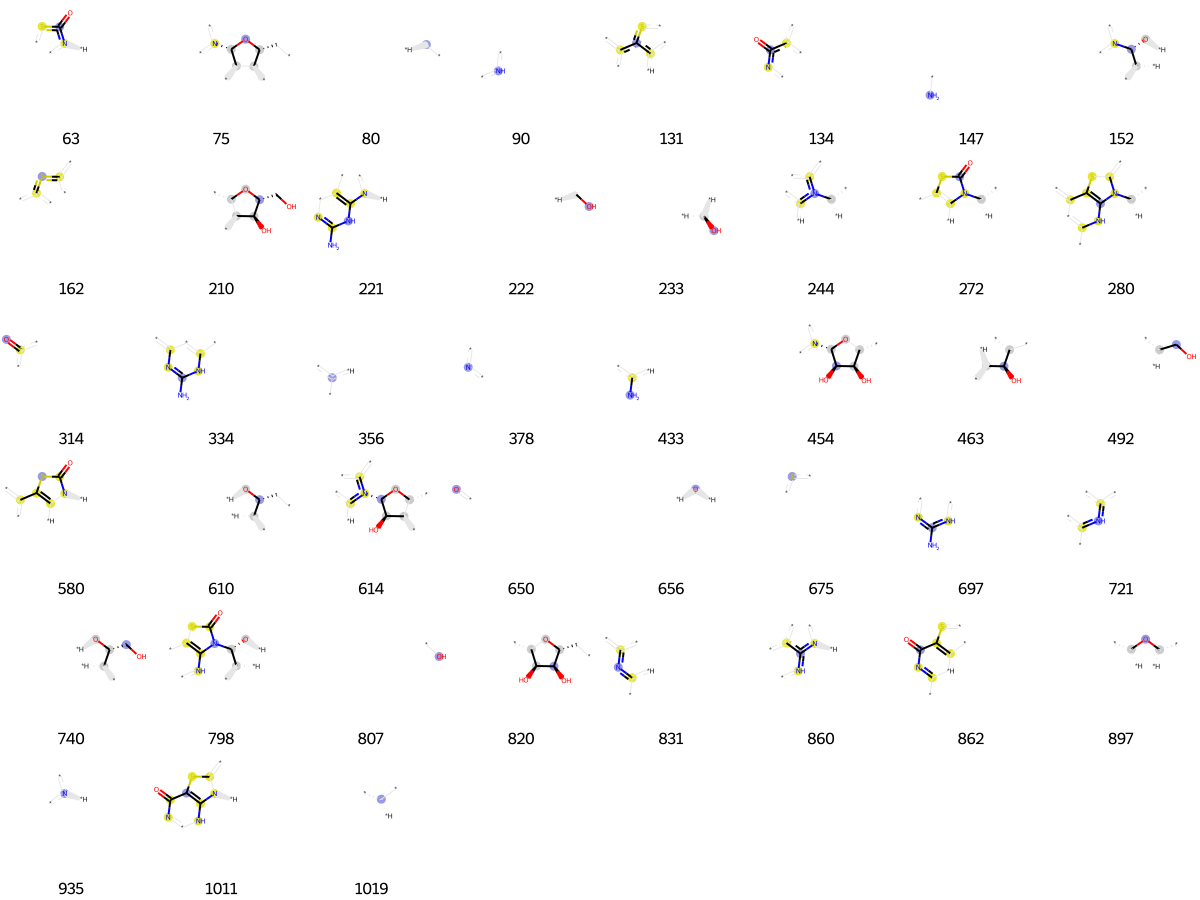

In [2168]:
prints = [(M43, x, bi) for x in fp43.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp43.GetOnBits ()])

In [2169]:
bi = {}

fp44= AllChem.GetMorganFingerprintAsBitVect(M44, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp44, fp_arr)
np.nonzero(fp_arr)
list(fp44.GetOnBits())

[10,
 11,
 13,
 33,
 80,
 147,
 312,
 319,
 336,
 414,
 428,
 628,
 650,
 695,
 807,
 846,
 893,
 913,
 1017]

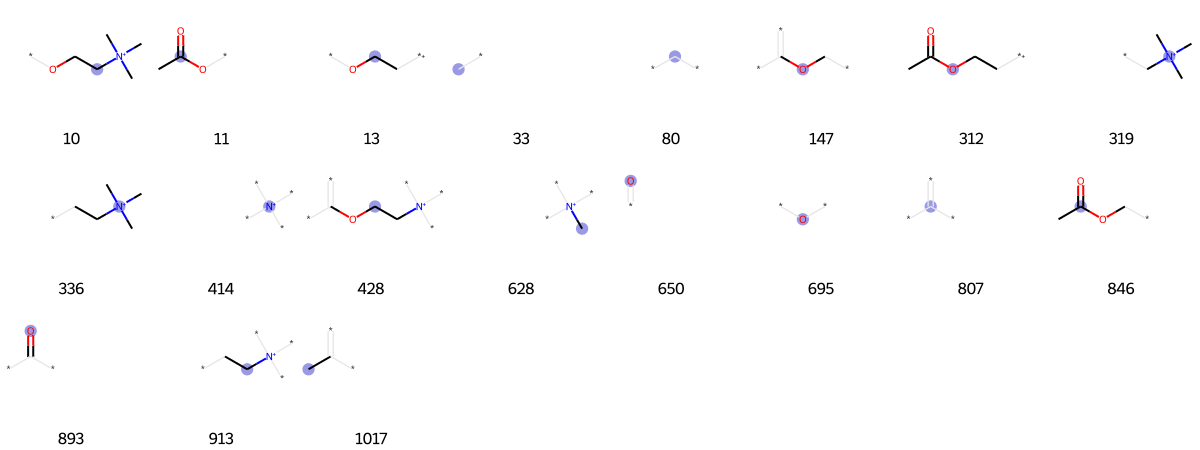

In [2170]:
prints = [(M44, x, bi) for x in fp44.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp44.GetOnBits ()])

In [2171]:
bi = {}

fp45= AllChem.GetMorganFingerprintAsBitVect(M45, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp45, fp_arr)
np.nonzero(fp_arr)
list(fp45.GetOnBits())

[64,
 112,
 147,
 175,
 329,
 356,
 360,
 378,
 389,
 409,
 428,
 433,
 480,
 525,
 584,
 694,
 726,
 787,
 831,
 835,
 842,
 849,
 878,
 913,
 977,
 1008,
 1009]

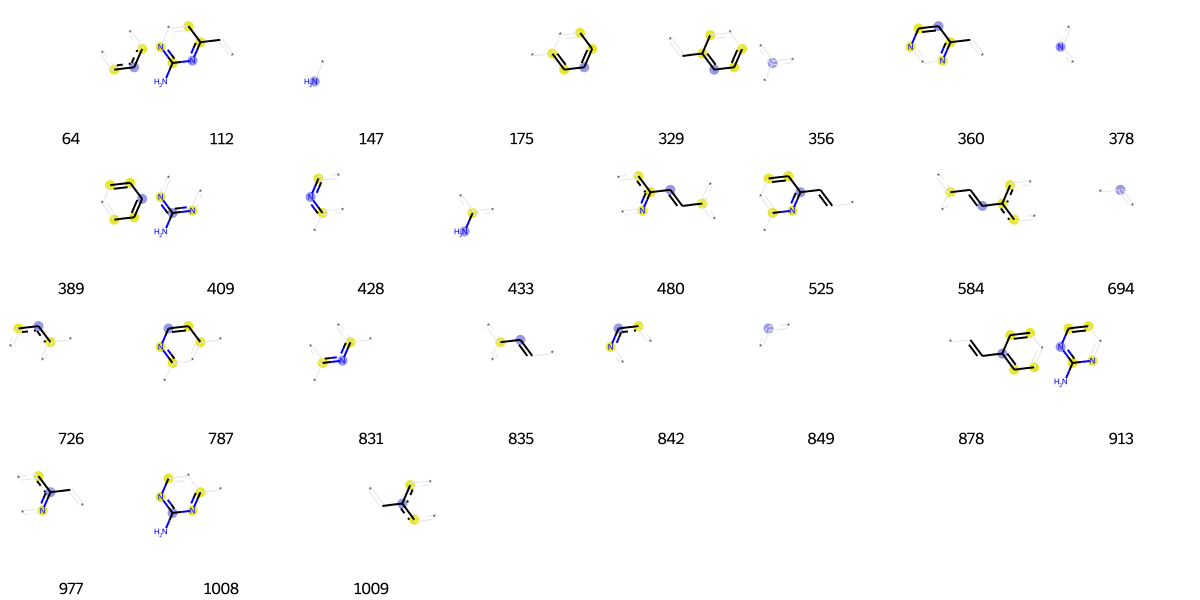

In [2172]:
prints = [(M45, x, bi) for x in fp45.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp45.GetOnBits ()])

In [2173]:
bi = {}

fp46= AllChem.GetMorganFingerprintAsBitVect(M46, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp46, fp_arr)
np.nonzero(fp_arr)
list(fp46.GetOnBits())

[15,
 33,
 45,
 54,
 64,
 72,
 96,
 114,
 121,
 139,
 197,
 202,
 230,
 236,
 249,
 261,
 267,
 314,
 356,
 383,
 386,
 393,
 429,
 504,
 512,
 564,
 578,
 586,
 622,
 641,
 650,
 682,
 695,
 726,
 771,
 807,
 809,
 841,
 849,
 864,
 867,
 881,
 893,
 896,
 904,
 935,
 946,
 954,
 960]

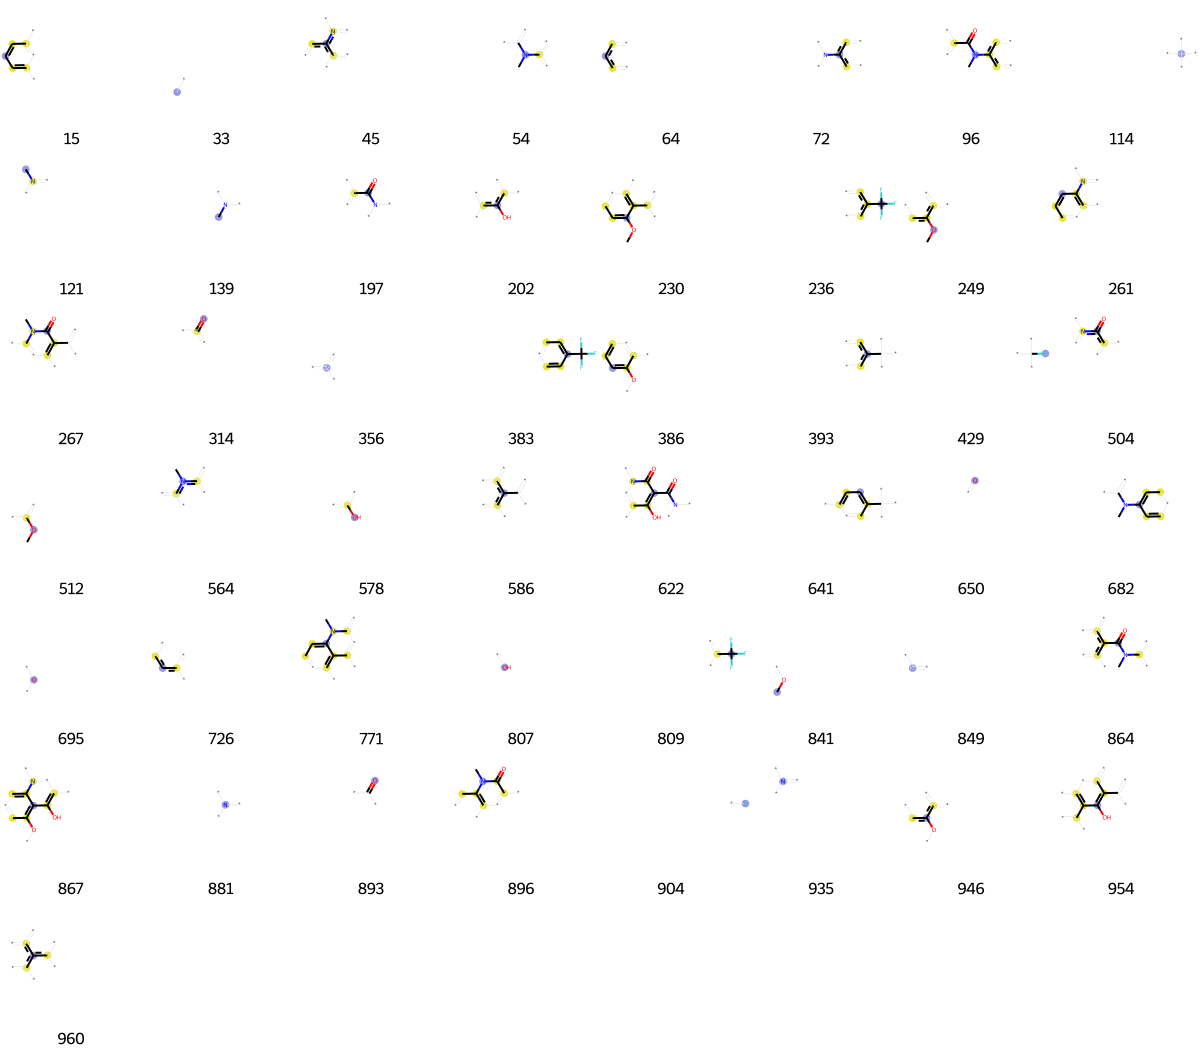

In [2174]:
prints = [(M46, x, bi) for x in fp46.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp46.GetOnBits ()])

In [2175]:
bi = {}

fp47= AllChem.GetMorganFingerprintAsBitVect(M47, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp47, fp_arr)
np.nonzero(fp_arr)
list(fp47.GetOnBits())

[33,
 64,
 136,
 147,
 173,
 175,
 179,
 248,
 319,
 323,
 342,
 350,
 356,
 361,
 378,
 389,
 452,
 461,
 465,
 471,
 476,
 518,
 583,
 624,
 650,
 656,
 698,
 715,
 723,
 726,
 736,
 833,
 835,
 849,
 896]

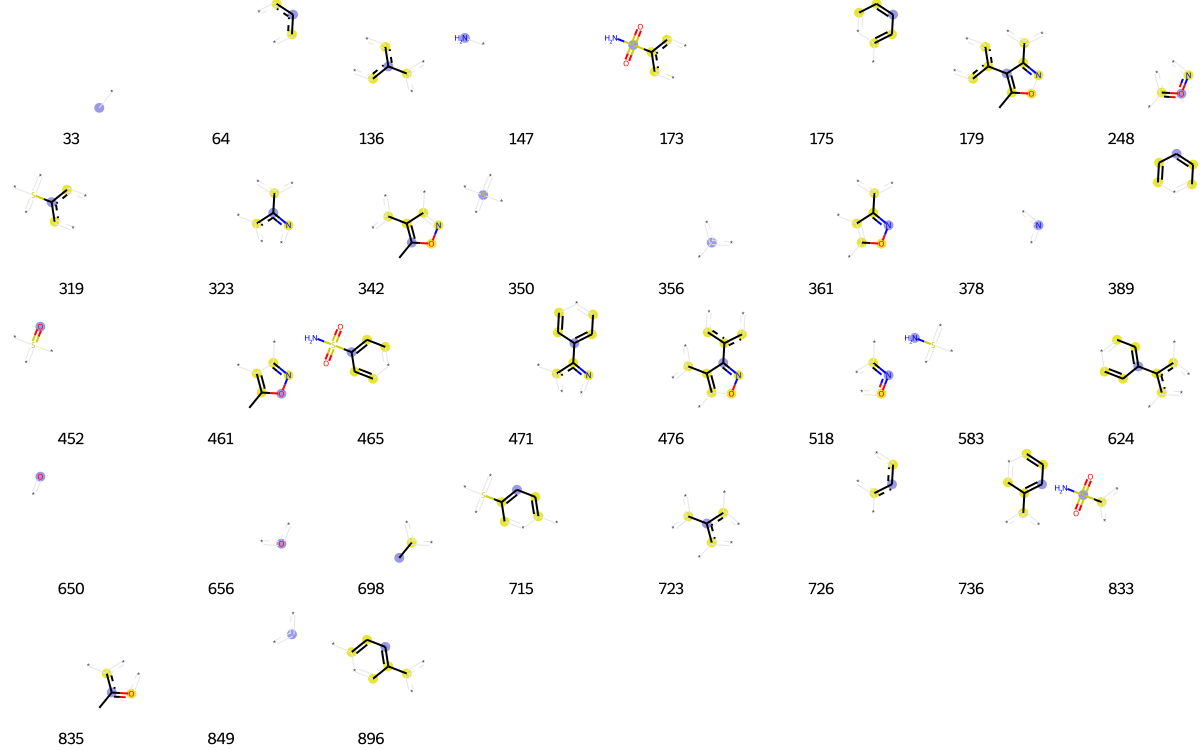

In [2176]:
prints = [(M47, x, bi) for x in fp47.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp47.GetOnBits ()])

In [2177]:
bi = {}

fp49= AllChem.GetMorganFingerprintAsBitVect(M49, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp49, fp_arr)
np.nonzero(fp_arr)
list(fp49.GetOnBits())

[1,
 14,
 27,
 71,
 80,
 118,
 128,
 161,
 191,
 200,
 212,
 222,
 227,
 272,
 314,
 322,
 329,
 352,
 356,
 386,
 421,
 428,
 452,
 459,
 463,
 477,
 482,
 491,
 526,
 641,
 646,
 650,
 658,
 680,
 695,
 699,
 714,
 718,
 726,
 754,
 789,
 807,
 816,
 819,
 832,
 843,
 849,
 875,
 891,
 901,
 904,
 926,
 953,
 956,
 1014]

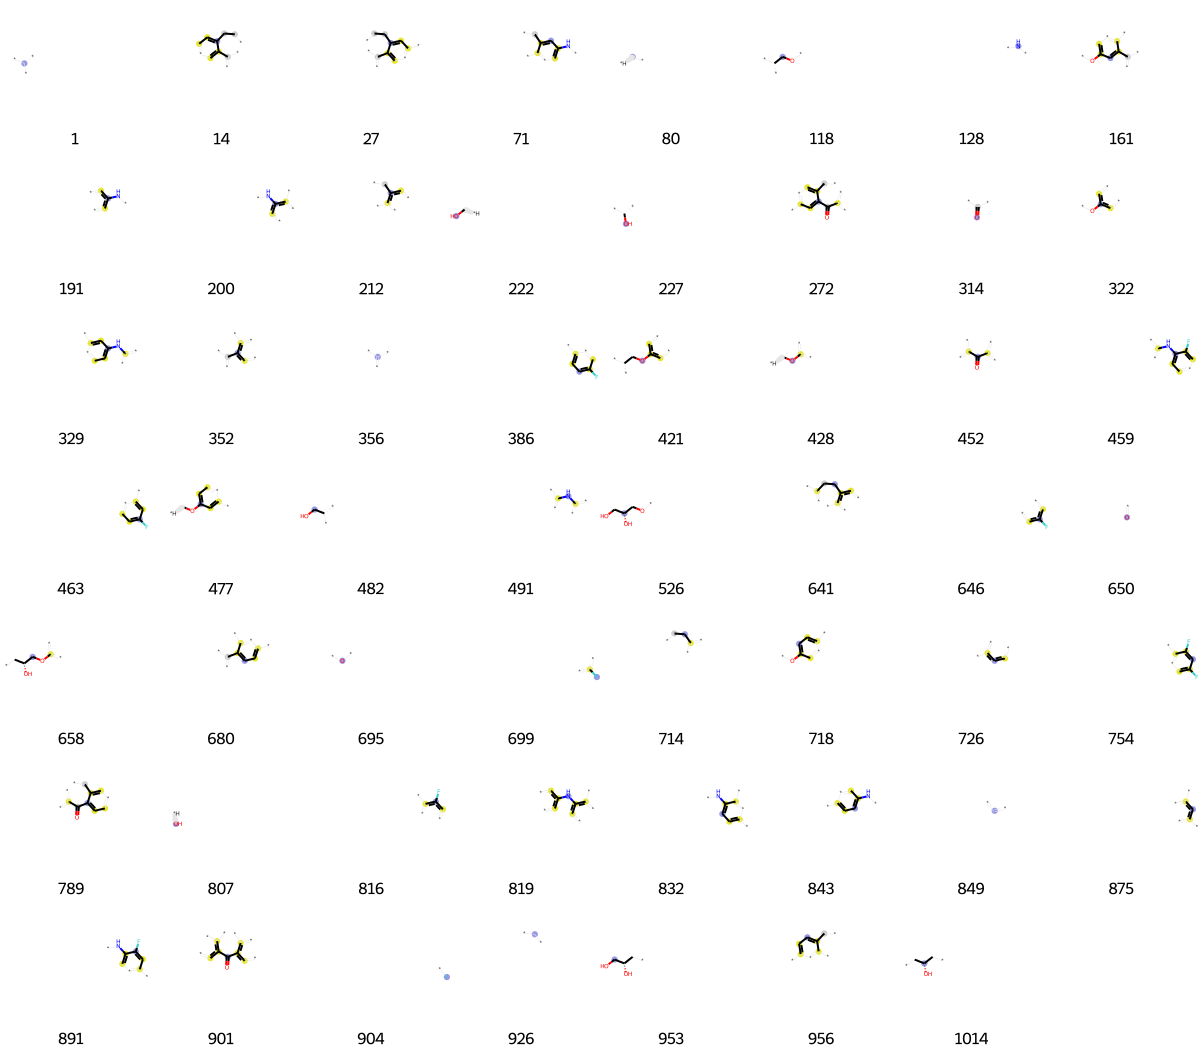

In [2178]:
prints = [(M49, x, bi) for x in fp49.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp49.GetOnBits ()])

In [2179]:
bi = {}

fp50= AllChem.GetMorganFingerprintAsBitVect(M50, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp50, fp_arr)
np.nonzero(fp_arr)
list(fp50.GetOnBits())

[15,
 41,
 42,
 64,
 73,
 80,
 94,
 112,
 114,
 128,
 131,
 162,
 187,
 200,
 213,
 216,
 236,
 240,
 251,
 301,
 317,
 322,
 325,
 334,
 339,
 344,
 346,
 356,
 358,
 360,
 378,
 385,
 393,
 420,
 429,
 441,
 498,
 532,
 593,
 650,
 674,
 675,
 689,
 695,
 699,
 716,
 718,
 726,
 730,
 732,
 785,
 790,
 792,
 798,
 800,
 807,
 809,
 816,
 831,
 849,
 875,
 893,
 898,
 904,
 924,
 926,
 946,
 961,
 974,
 993,
 1019]

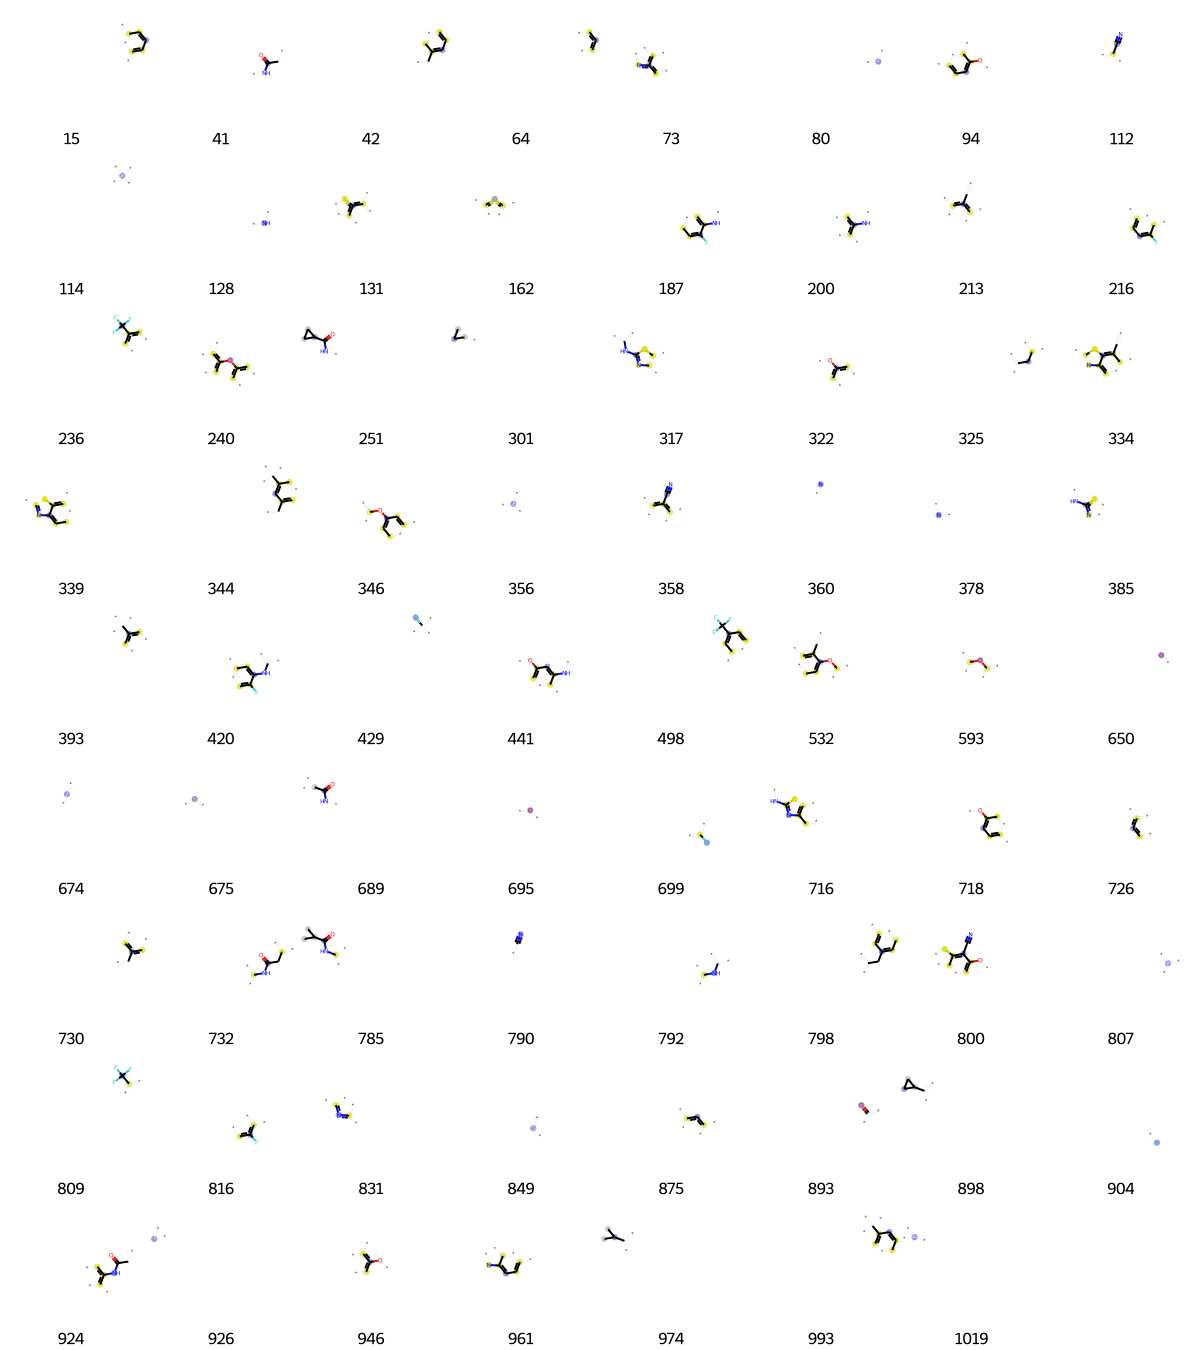

In [2180]:
prints = [(M50, x, bi) for x in fp50.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp50.GetOnBits ()])